In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
# create dict 'pbp', contains play by play details from 2006-2019, inclusive

pbp = {}
for YEAR in range(2006, 2020):
    pbp[str(YEAR)] = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(YEAR) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)
    print(f'{YEAR} done!')

2006 done!
2007 done!
2008 done!
2009 done!
2010 done!
2011 done!
2012 done!
2013 done!
2014 done!
2015 done!
2016 done!
2017 done!
2018 done!
2019 done!


In [3]:
# select only complete passes, where we have xyac_fd data

data_fdoe = {}

for _ , j in enumerate(pbp):
    YEAR = str(j)
    temp_pbp = pbp[YEAR]
    data_fdoe[YEAR] = temp_pbp.loc[(temp_pbp.xyac_fd.isna() == False) &
                              (temp_pbp.complete_pass == 1)]

In [4]:
# testing on 2019 data
# group by team

temp = data_fdoe['2019'].groupby('posteam', as_index=False).agg({'first_down': 'mean', 
                                                             'xyac_fd': 'mean',
                                                             'play_id': 'count'})
temp = temp[temp.play_id > 50]
temp['fd_oe'] = (temp['first_down'] - temp['xyac_fd']) * temp['play_id']
temp = temp.sort_values('fd_oe', axis=0)
temp

,posteam,first_down,xyac_fd,play_id,fd_oe
23,NYG,0.486264,0.537783,364,-18.753148
5,CHI,0.464986,0.516720,357,-18.469193
25,PHI,0.530612,0.565457,392,-13.659117
8,DAL,0.584656,0.608527,378,-9.023241
9,DEN,0.513245,0.533853,302,-6.223520
20,MIN,0.500000,0.516562,342,-5.664107
24,NYJ,0.501587,0.517305,315,-4.950923
10,DET,0.557576,0.572275,330,-4.850882
0,ARI,0.495702,0.509148,349,-4.692564
7,CLE,0.549342,0.564363,304,-4.566212


In [5]:
# dict of team colors, courtesy of @Pavel_Vab

team_colors_primary = {"TB": "#D50A0A", "DET": "#0076b6", "TEN": "#0C2340", "BAL": "#241773",
                       "GB": "#FFB612", "MIA": "#FC4C02", "DAL": "#041E42", "BUF": "#00338D",
                       "CLE": "#311D00", "HOU": "#03202f", "WAS": "#FFB612", "LAC": "#0080C6",
                       "CHI": "#c83803", "KC": "#E31837", "NYJ": "#125740", "PHI": "#004C54",
                       "NYG": "#0B2265", "IND": "#002C5F", "ATL": "#000000", "MIN": "#4F2683",
                       "CAR": "#0085CA", "CIN": "#fb4f14", "LA": "#866D4B", "ARI": "#000000",
                       "NE": "#B0B7BC", "SF": "#B3995D", "LV": "#A5ACAF", "JAX": "#006778",
                       "PIT": "#FFB612", "NO": "#D3BC8D", "DEN": "#FB4F14", "SEA": "#69BE28",
                       }
team_colors_secondary = {"TB": "#FF7900", "DET": "#B0B7BC", "TEN": "#4B92DB", "BAL": "#000000",
                         "GB": "#203731", "MIA": "#008E97", "DAL": "#869397", "BUF": "#C60C30",
                         "CLE": "#ff3c00", "HOU": "#A71930", "WAS": "#773141", "LAC": "#FFC20E",
                         "CHI": "#0B162A", "KC": "#FFB81C", "NYJ": "#000000", "PHI": "#000000",
                         "NYG": "#a71930", "IND": "#A2AAAD", "ATL": "#a71930", "MIN": "#FFC62F",
                         "CAR": "#BFC0BF", "CIN": "#000000", "LA": "#002244", "ARI": "#97233F",
                         "NE": "#002244", "SF": "#AA0000", "LV": "#000000", "JAX": "#9F792C",
                         "PIT": "#101820", "NO": "#101820", "DEN": "#002244", "SEA": "#002244",
                         }

In [12]:
# look at first down over expectations, by team

fdoe_team = {}

for YEAR in range(2006, 2020):
    temp = data_fdoe[str(YEAR)].groupby('posteam', as_index=False).agg({'first_down': 'mean', 
                                                                        'xyac_fd': 'mean',
                                                                        'play_id': 'count'})
    temp['fd_oe'] = (temp['first_down'] - temp['xyac_fd']) * temp['play_id']
    fdoe_team[str(YEAR)] = temp

In [13]:
fdoe_team['2018']

,posteam,first_down,xyac_fd,play_id,fd_oe
0,ARI,0.480144,0.523453,277,-11.996391
1,ATL,0.550481,0.549894,416,0.244004
2,BAL,0.536873,0.565096,339,-9.567395
3,BUF,0.513208,0.527158,265,-3.696809
4,CAR,0.540166,0.540043,361,0.044546
5,CHI,0.498592,0.531932,355,-11.835931
6,CIN,0.527157,0.537852,313,-3.347747
7,CLE,0.513433,0.545273,335,-10.666526
8,DAL,0.506427,0.515774,389,-3.635953
9,DEN,0.488764,0.498798,356,-3.571937


In [14]:
fdoe_team['2019']

,posteam,first_down,xyac_fd,play_id,fd_oe
0,ARI,0.495702,0.509148,349,-4.692564
1,ATL,0.552809,0.553132,445,-0.143689
2,BAL,0.573826,0.557675,298,4.812748
3,BUF,0.534810,0.544453,316,-3.047250
4,CAR,0.606952,0.555398,374,19.281027
5,CHI,0.464986,0.516720,357,-18.469193
6,CIN,0.540230,0.541266,348,-0.360550
7,CLE,0.549342,0.564363,304,-4.566212
8,DAL,0.584656,0.608527,378,-9.023241
9,DEN,0.513245,0.533853,302,-6.223520


In [15]:
float(fdoe_team['2018'].loc[fdoe_team['2018'].posteam == 'CAR'].fd_oe)

0.044546392251493705

In [16]:
# find year-over-year correlation for team fdoe

team_fdoe_yoy_x = []
team_fdoe_yoy_y = []
for i in range(2006, 2019):
    YEAR = str(i)
    temp = fdoe_team[YEAR]
    temp_next = fdoe_team[str(i+1)]
    for j in range(32):
        x = float(temp.iloc[j].fd_oe)
        y = float(temp_next.iloc[j].fd_oe)
        assert temp.iloc[j].posteam == temp_next.iloc[j].posteam
        team_fdoe_yoy_x.append(x)
        team_fdoe_yoy_y.append(y)

In [17]:
m, b, r_team_fdoe, p, std_error = stats.linregress(team_fdoe_yoy_x, team_fdoe_yoy_y)
print(m, b)
print(r_team_fdoe**2)

0.2544592360992956 -0.43644659641022093
0.06449310466017706


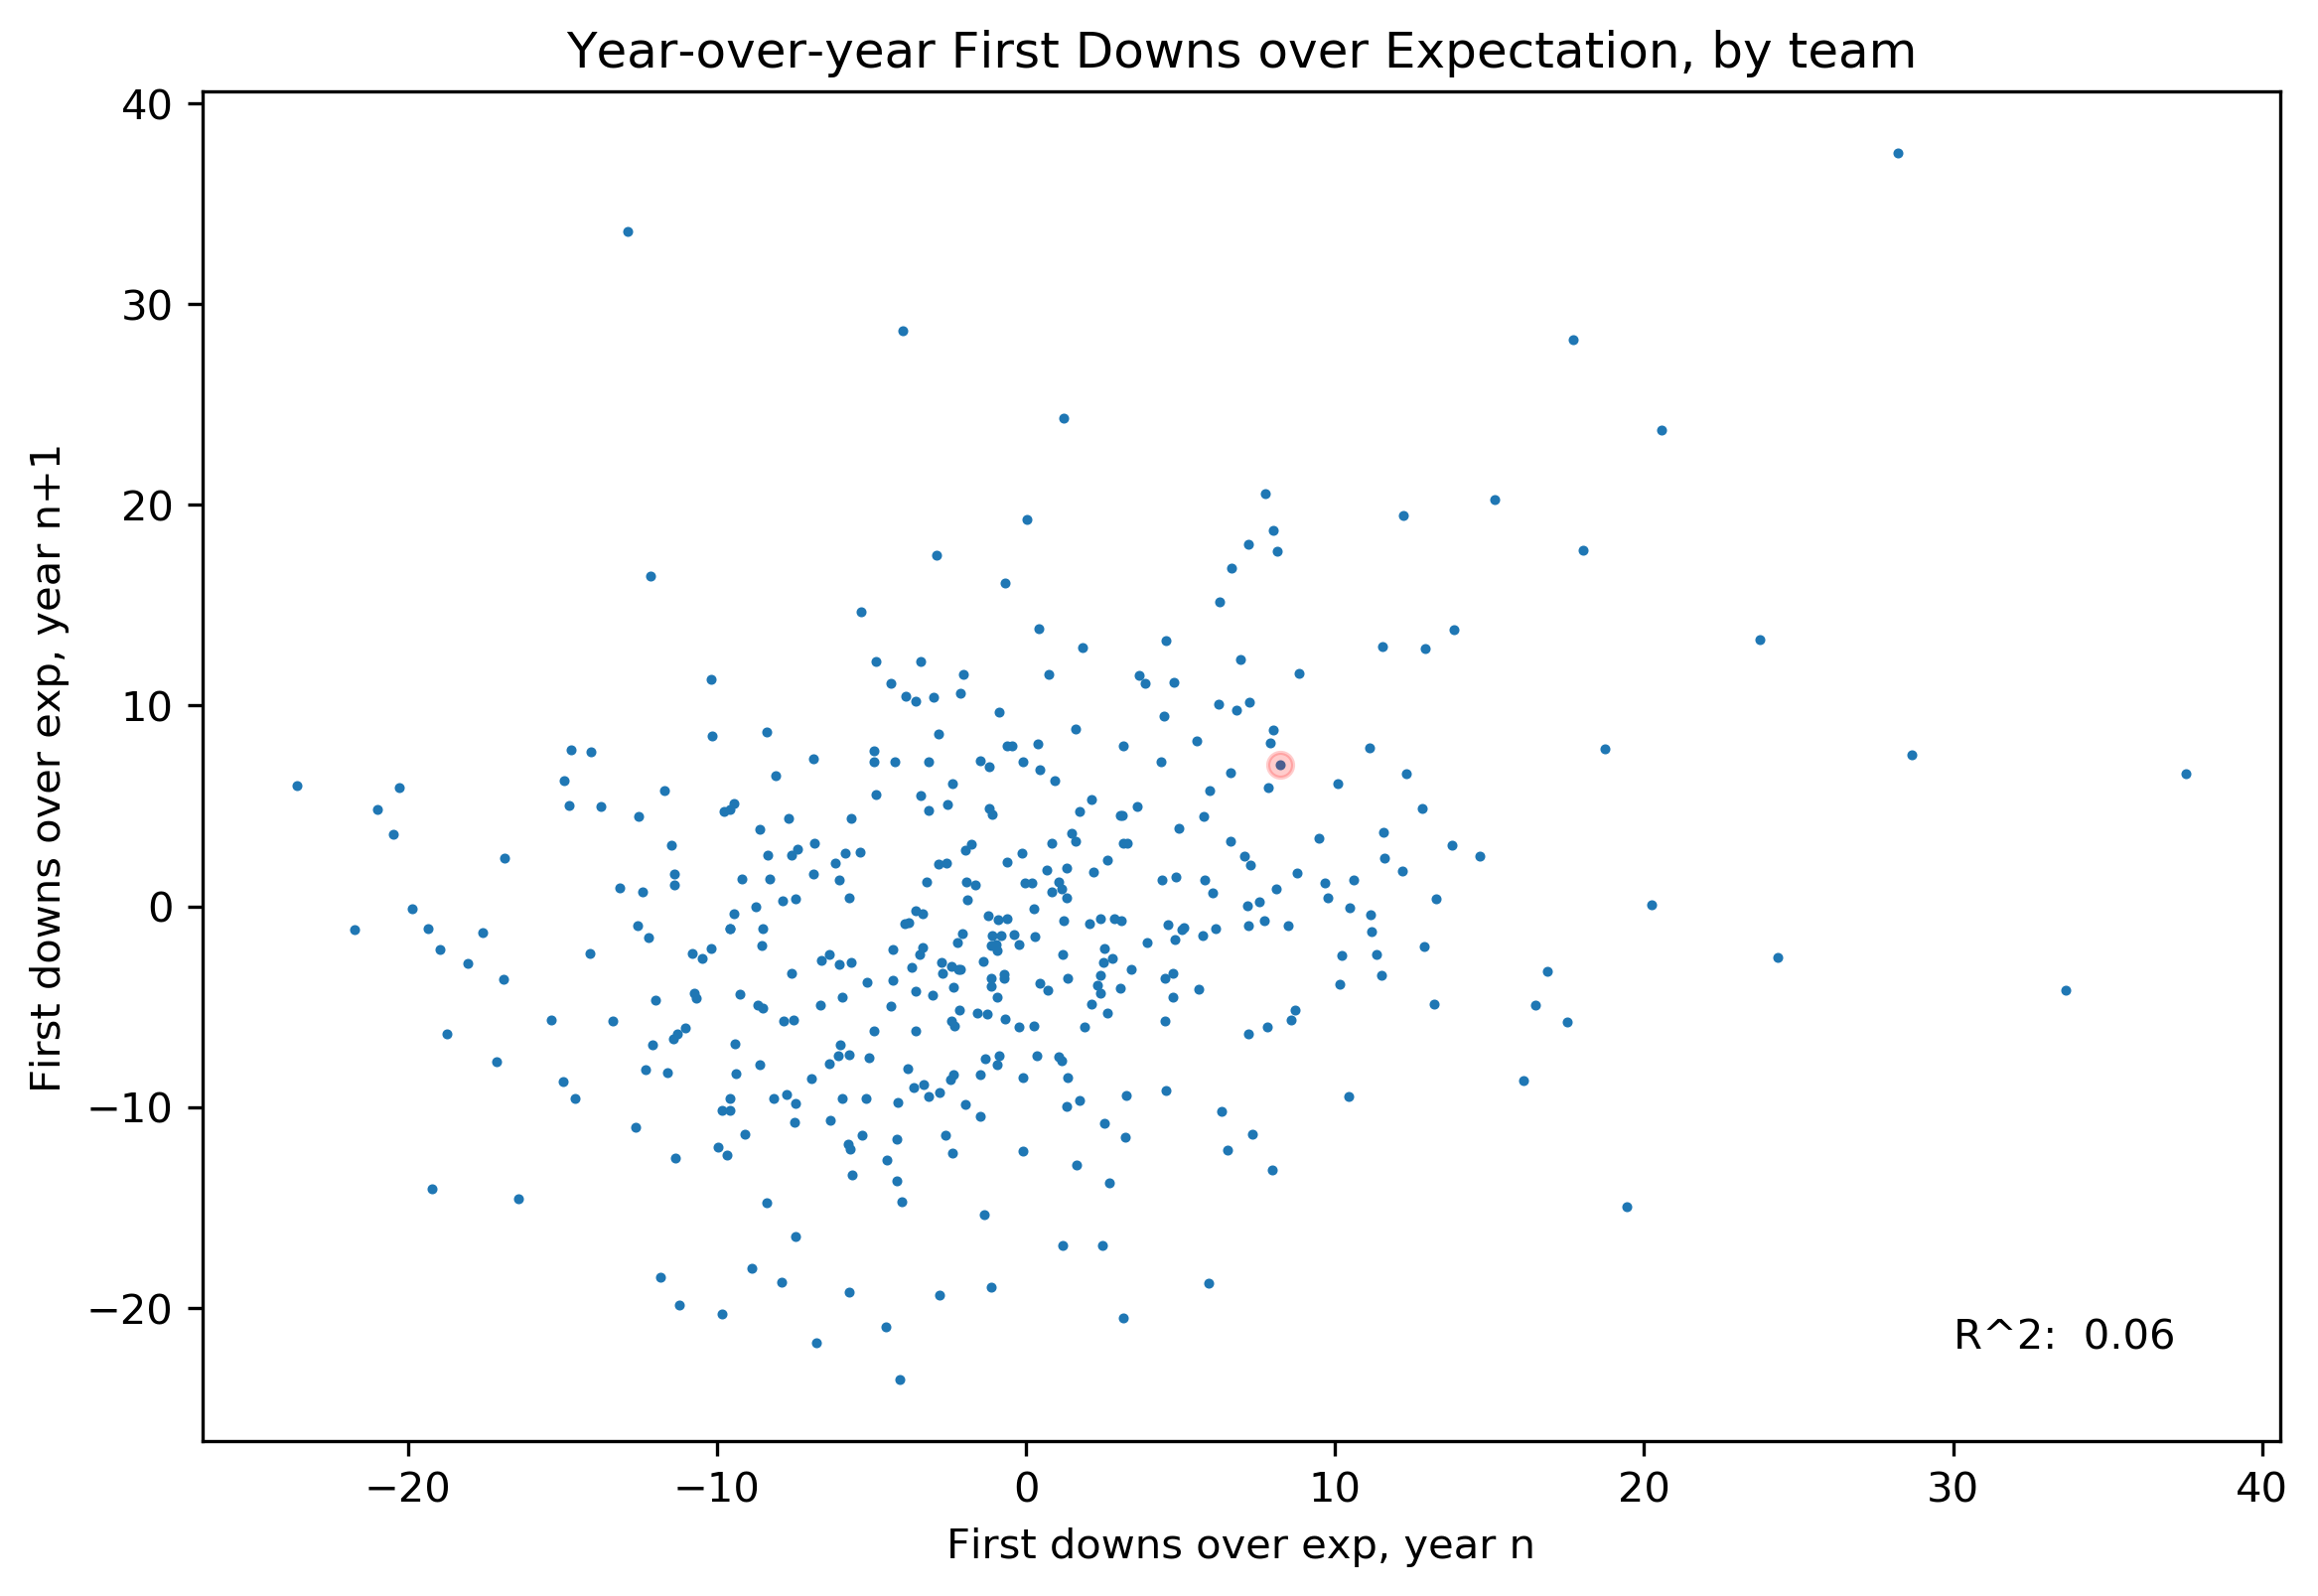

In [22]:
plt.figure(figsize=(9,6), dpi=300)
plt.title('Year-over-year First Downs over Expectation, by team')
plt.xlabel('First downs over exp, year n')
plt.ylabel('First downs over exp, year n+1')
plt.text(30, -22, f'R^2: {r_team_fdoe ** 2 : 0.2f}')
plt.scatter(team_fdoe_yoy_x, team_fdoe_yoy_y, 2)

# looking at random data points as a sanity check
team = 'DAL'
year = '2014'
year_next = str(int(year) + 1)
plt.scatter(fdoe_team[year].loc[fdoe_team[year].posteam == team].fd_oe, 
            fdoe_team[year_next].loc[fdoe_team[year_next].posteam == team].fd_oe, color='r', alpha=0.2);

In [32]:
fdoe_player = {}

for YEAR in range(2006, 2020):
    temp = data_fdoe[str(YEAR)].groupby(['receiver', 'posteam'], as_index=False).agg({'first_down': 'mean', 
                                                                                      'xyac_fd': 'mean',
                                                                                      'play_id': 'count'})
    temp['fd_oe'] = (temp['first_down'] - temp['xyac_fd']) * temp['play_id']
    temp = temp.loc[temp.play_id > 50]
    fdoe_player[str(YEAR)] = temp


fdoe_player['2007']

,receiver,posteam,first_down,xyac_fd,play_id,fd_oe
3,A.Boldin,ARI,0.582090,0.589227,67,-0.478226
11,A.Gates,LAC,0.692308,0.674479,78,1.390672
19,A.Johnson,HOU,0.642857,0.675830,56,-1.846504
28,A.Randle,WAS,0.716667,0.702522,60,0.848687
32,A.Toomer,NYG,0.693333,0.708932,75,-1.169872
35,B.Berrian,CHI,0.666667,0.651024,66,1.032446
40,B.Edwards,CLE,0.701493,0.705051,67,-0.238414
41,B.Engram,SEA,0.666667,0.657459,96,0.883983
56,B.Marshall,DEN,0.677083,0.613870,96,6.068447
69,B.Westbrook,PHI,0.367816,0.372689,87,-0.423979


In [34]:
player_fdoe_yoy_x = []
player_fdoe_yoy_y = []
for i in range(2006, 2019):
    YEAR = str(i)
    temp = fdoe_player[YEAR]
    temp_next = fdoe_player[str(i+1)]
    receivers = temp.receiver.unique()
    receivers_next = temp_next.receiver.unique()
    for player in receivers:
        if player not in receivers_next:
            continue
        x = temp.loc[temp.receiver == player]['fd_oe']
        # avoiding repeat names (like R. Williams in 2007)
        if len(x) > 1:
            continue
        y = temp_next.loc[temp_next.receiver == player]['fd_oe']
        if len(y) > 1:
            continue
        x = float(x)
        y = float(y)
        player_fdoe_yoy_x.append(x)
        player_fdoe_yoy_y.append(y)

In [36]:
m, b, r_player_fdoe, p, std_error = stats.linregress(player_fdoe_yoy_x, player_fdoe_yoy_y)
print(m, b)
print(r_player_fdoe**2)

0.2504744510976907 -0.3443714294607204
0.06070977504050451


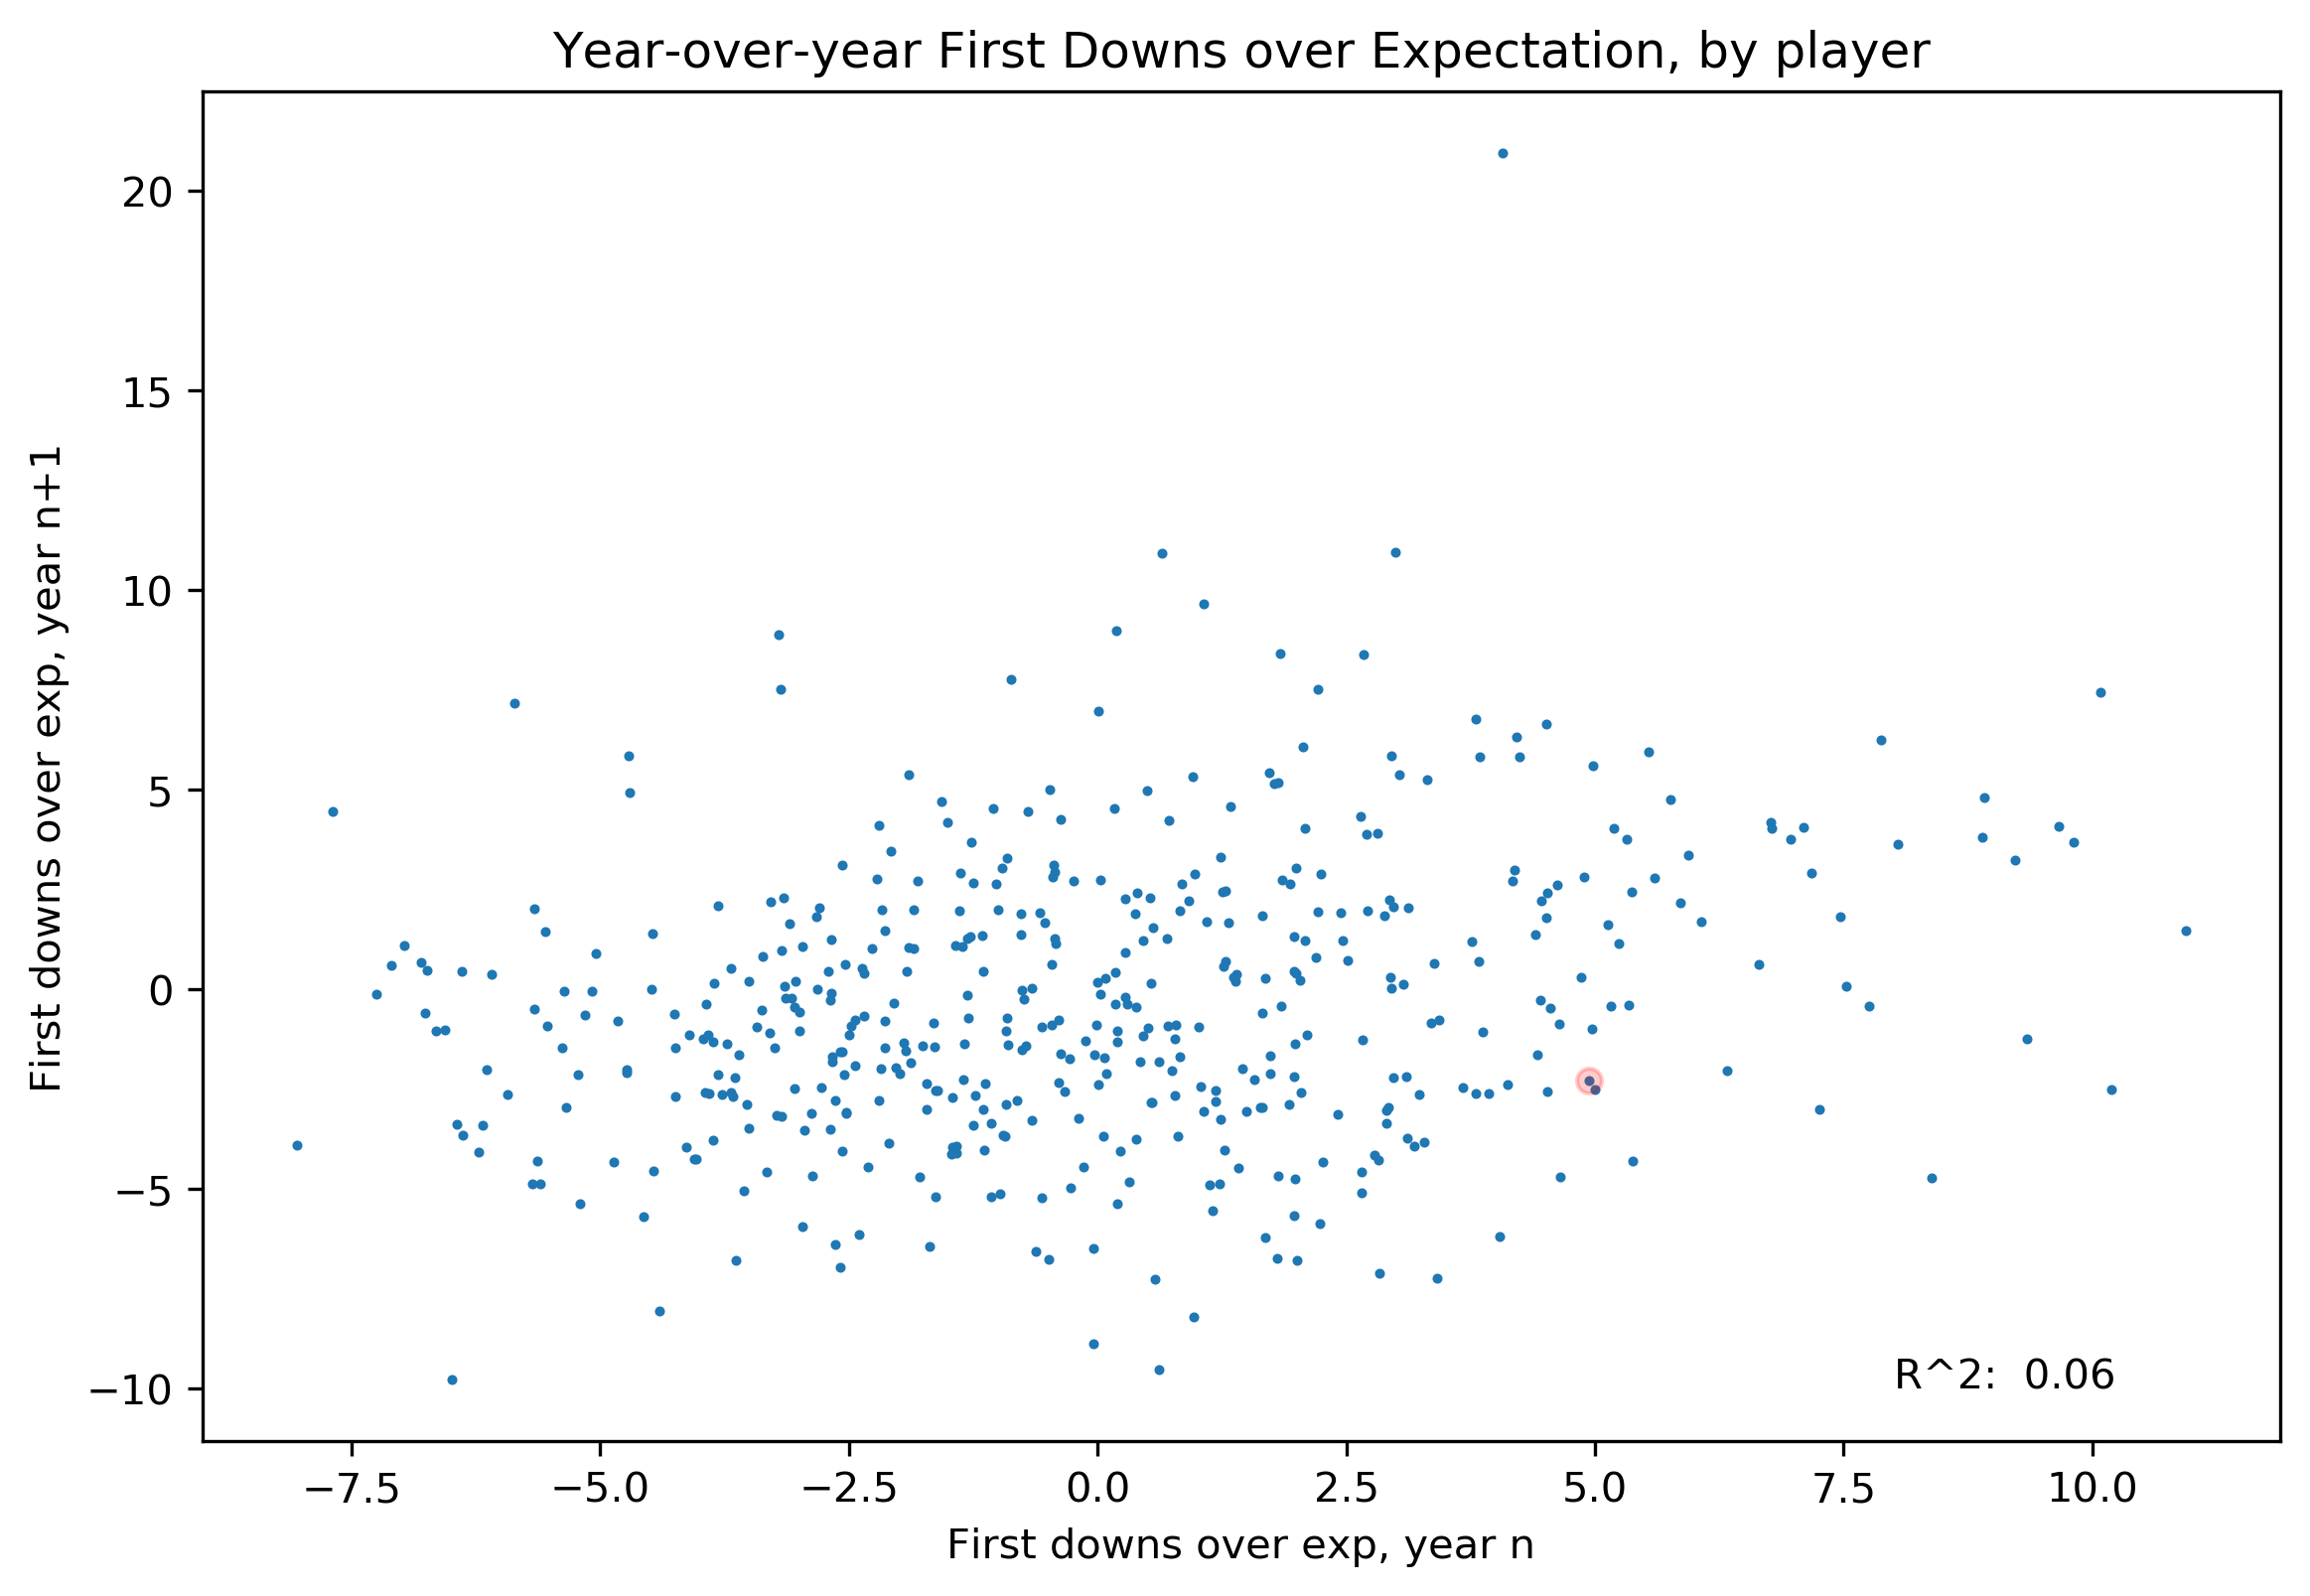

In [39]:
plt.figure(figsize=(9,6), dpi=300)
plt.title('Year-over-year First Downs over Expectation, by player')
plt.xlabel('First downs over exp, year n')
plt.ylabel('First downs over exp, year n+1')
plt.text(8, -10, f'R^2: {r_player_fdoe ** 2 : 0.2f}')
plt.scatter(player_fdoe_yoy_x, player_fdoe_yoy_y, 2)

# looking at random data points as a sanity check
player = 'D.Bryant'
year = '2013'
year_next = str(int(year) + 1)
plt.scatter(fdoe_player[year].loc[fdoe_player[year].receiver == player].fd_oe, 
            fdoe_player[year_next].loc[fdoe_player[year_next].receiver == player].fd_oe, color='r', alpha=0.2);

In [40]:
# now lets look at xyac_epa
# select complete passes with xyac epa data

data_yac_epa = {}

for _ , j in enumerate(pbp):
    YEAR = str(j)
    temp_pbp = pbp[YEAR]
    data_yac_epa[YEAR] = temp_pbp.loc[(temp_pbp.xyac_epa.isna() == False) &
                                      (temp_pbp.complete_pass == 1)]

In [41]:
yac_epa_team = {}

for YEAR in range(2006, 2020):
    temp = data_yac_epa[str(YEAR)].groupby('posteam', as_index=False).agg({'yac_epa': 'mean', 
                                                                           'xyac_epa': 'mean',
                                                                           'play_id': 'count'})
    temp['epa_oe'] = (temp['yac_epa'] - temp['xyac_epa']) * temp['play_id']
    yac_epa_team[str(YEAR)] = temp
yac_epa_team['2019']

,posteam,yac_epa,xyac_epa,play_id,epa_oe
0,ARI,0.738552,0.837012,349,-34.362546
1,ATL,0.588383,0.665523,445,-34.327264
2,BAL,0.747781,0.726713,298,6.278257
3,BUF,0.661465,0.676929,316,-4.886458
4,CAR,0.775923,0.761267,374,5.481252
5,CHI,0.580135,0.739760,357,-56.985957
6,CIN,0.584921,0.693598,348,-37.819744
7,CLE,0.684090,0.709764,304,-7.804872
8,DAL,0.548232,0.583704,378,-13.408515
9,DEN,0.724147,0.821772,302,-29.482873


In [42]:
team_epa_yoy_x = []
team_epa_yoy_y = []
for i in range(2006, 2019):
    YEAR = str(i)
    temp = yac_epa_team[YEAR]
    temp_next = yac_epa_team[str(i+1)]
    for j in range(32):
        x = float(temp.iloc[j].epa_oe)
        y = float(temp_next.iloc[j].epa_oe)
        assert temp.iloc[j].posteam == temp_next.iloc[j].posteam
        team_epa_yoy_x.append(x)
        team_epa_yoy_y.append(y)

In [43]:
m, b, r_team_epa, p, std_error = stats.linregress(team_epa_yoy_x, team_epa_yoy_y)
print(m, b)
print(r_team_epa**2)

0.30227751230747324 -10.143235903054592
0.0898023701222749


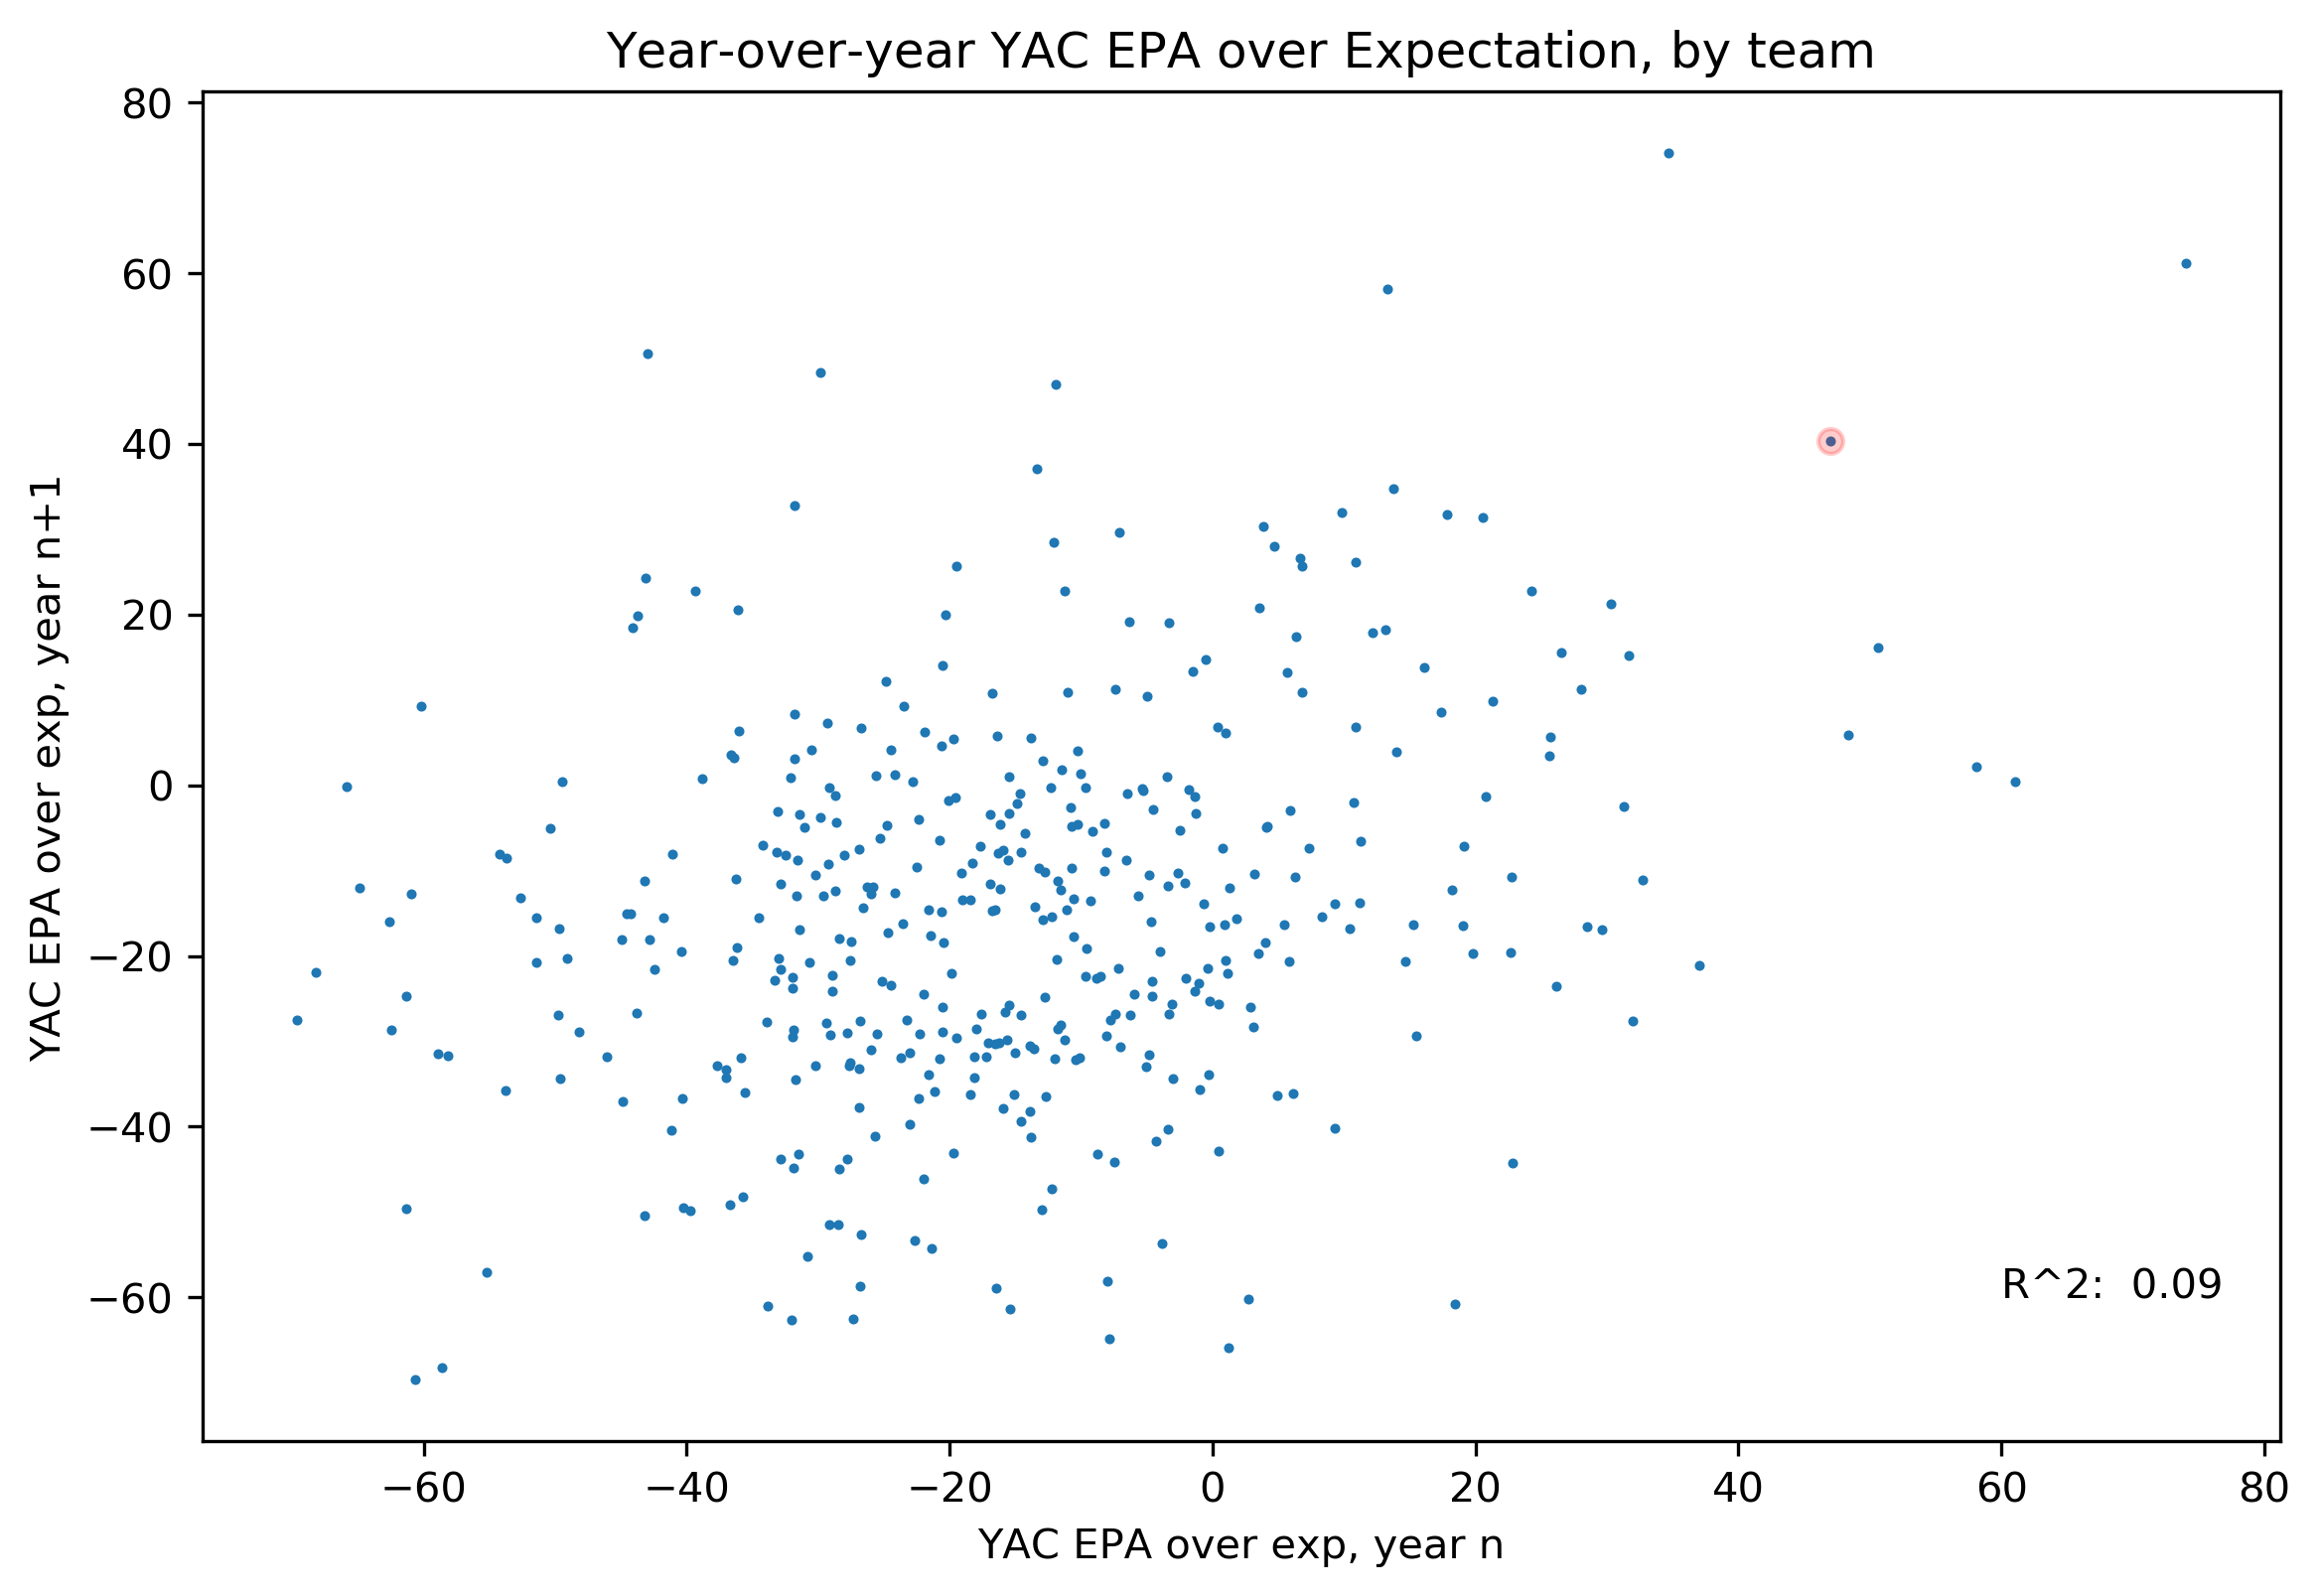

In [45]:
plt.figure(figsize=(9,6), dpi=300)
plt.title('Year-over-year YAC EPA over Expectation, by team')
plt.xlabel('YAC EPA over exp, year n')
plt.ylabel('YAC EPA over exp, year n+1')
plt.text(60, -60, f'R^2: {r_team_epa ** 2 : 0.2f}')
plt.scatter(team_epa_yoy_x, team_epa_yoy_y, 2)

# looking at random data points as a sanity check
team = 'SF'
year = '2018'
year_next = str(int(year) + 1)
plt.scatter(yac_epa_team[year].loc[yac_epa_team[year].posteam == team].epa_oe, 
            yac_epa_team[year_next].loc[yac_epa_team[year_next].posteam == team].epa_oe, color='r', alpha=0.2);

In [46]:
yac_epa_player = {}

for YEAR in range(2006, 2020):
    temp = data_yac_epa[str(YEAR)].groupby(['receiver', 'posteam'], as_index=False).agg({'yac_epa': 'mean', 
                                                                                         'xyac_epa': 'mean',
                                                                                         'play_id': 'count'})
    temp['epa_oe'] = (temp['yac_epa'] - temp['xyac_epa']) * temp['play_id']
    temp = temp.loc[temp.play_id > 50]
    yac_epa_player[str(YEAR)] = temp

In [48]:
player_epa_yoy_x = []
player_epa_yoy_y = []
for i in range(2006, 2019):
    YEAR = str(i)
    temp = yac_epa_player[YEAR]
    temp_next = yac_epa_player[str(i+1)]
    receivers = temp.receiver.unique()
    receivers_next = temp_next.receiver.unique()
    for player in receivers:
        if player not in receivers_next:
            continue
        x = temp.loc[temp.receiver == player]['epa_oe']
        if len(x) > 1:
            continue
        y = temp_next.loc[temp_next.receiver == player]['epa_oe']
        if len(y) > 1:
            continue
        x = float(x)
        y = float(y)
        player_epa_yoy_x.append(x)
        player_epa_yoy_y.append(y)

In [49]:
m, b, r_player_epa, p, std_error = stats.linregress(player_epa_yoy_x, player_epa_yoy_y)
print(m, b)
print(r_player_epa**2)

0.34667306727760633 -2.5249466435942756
0.11743697777056593


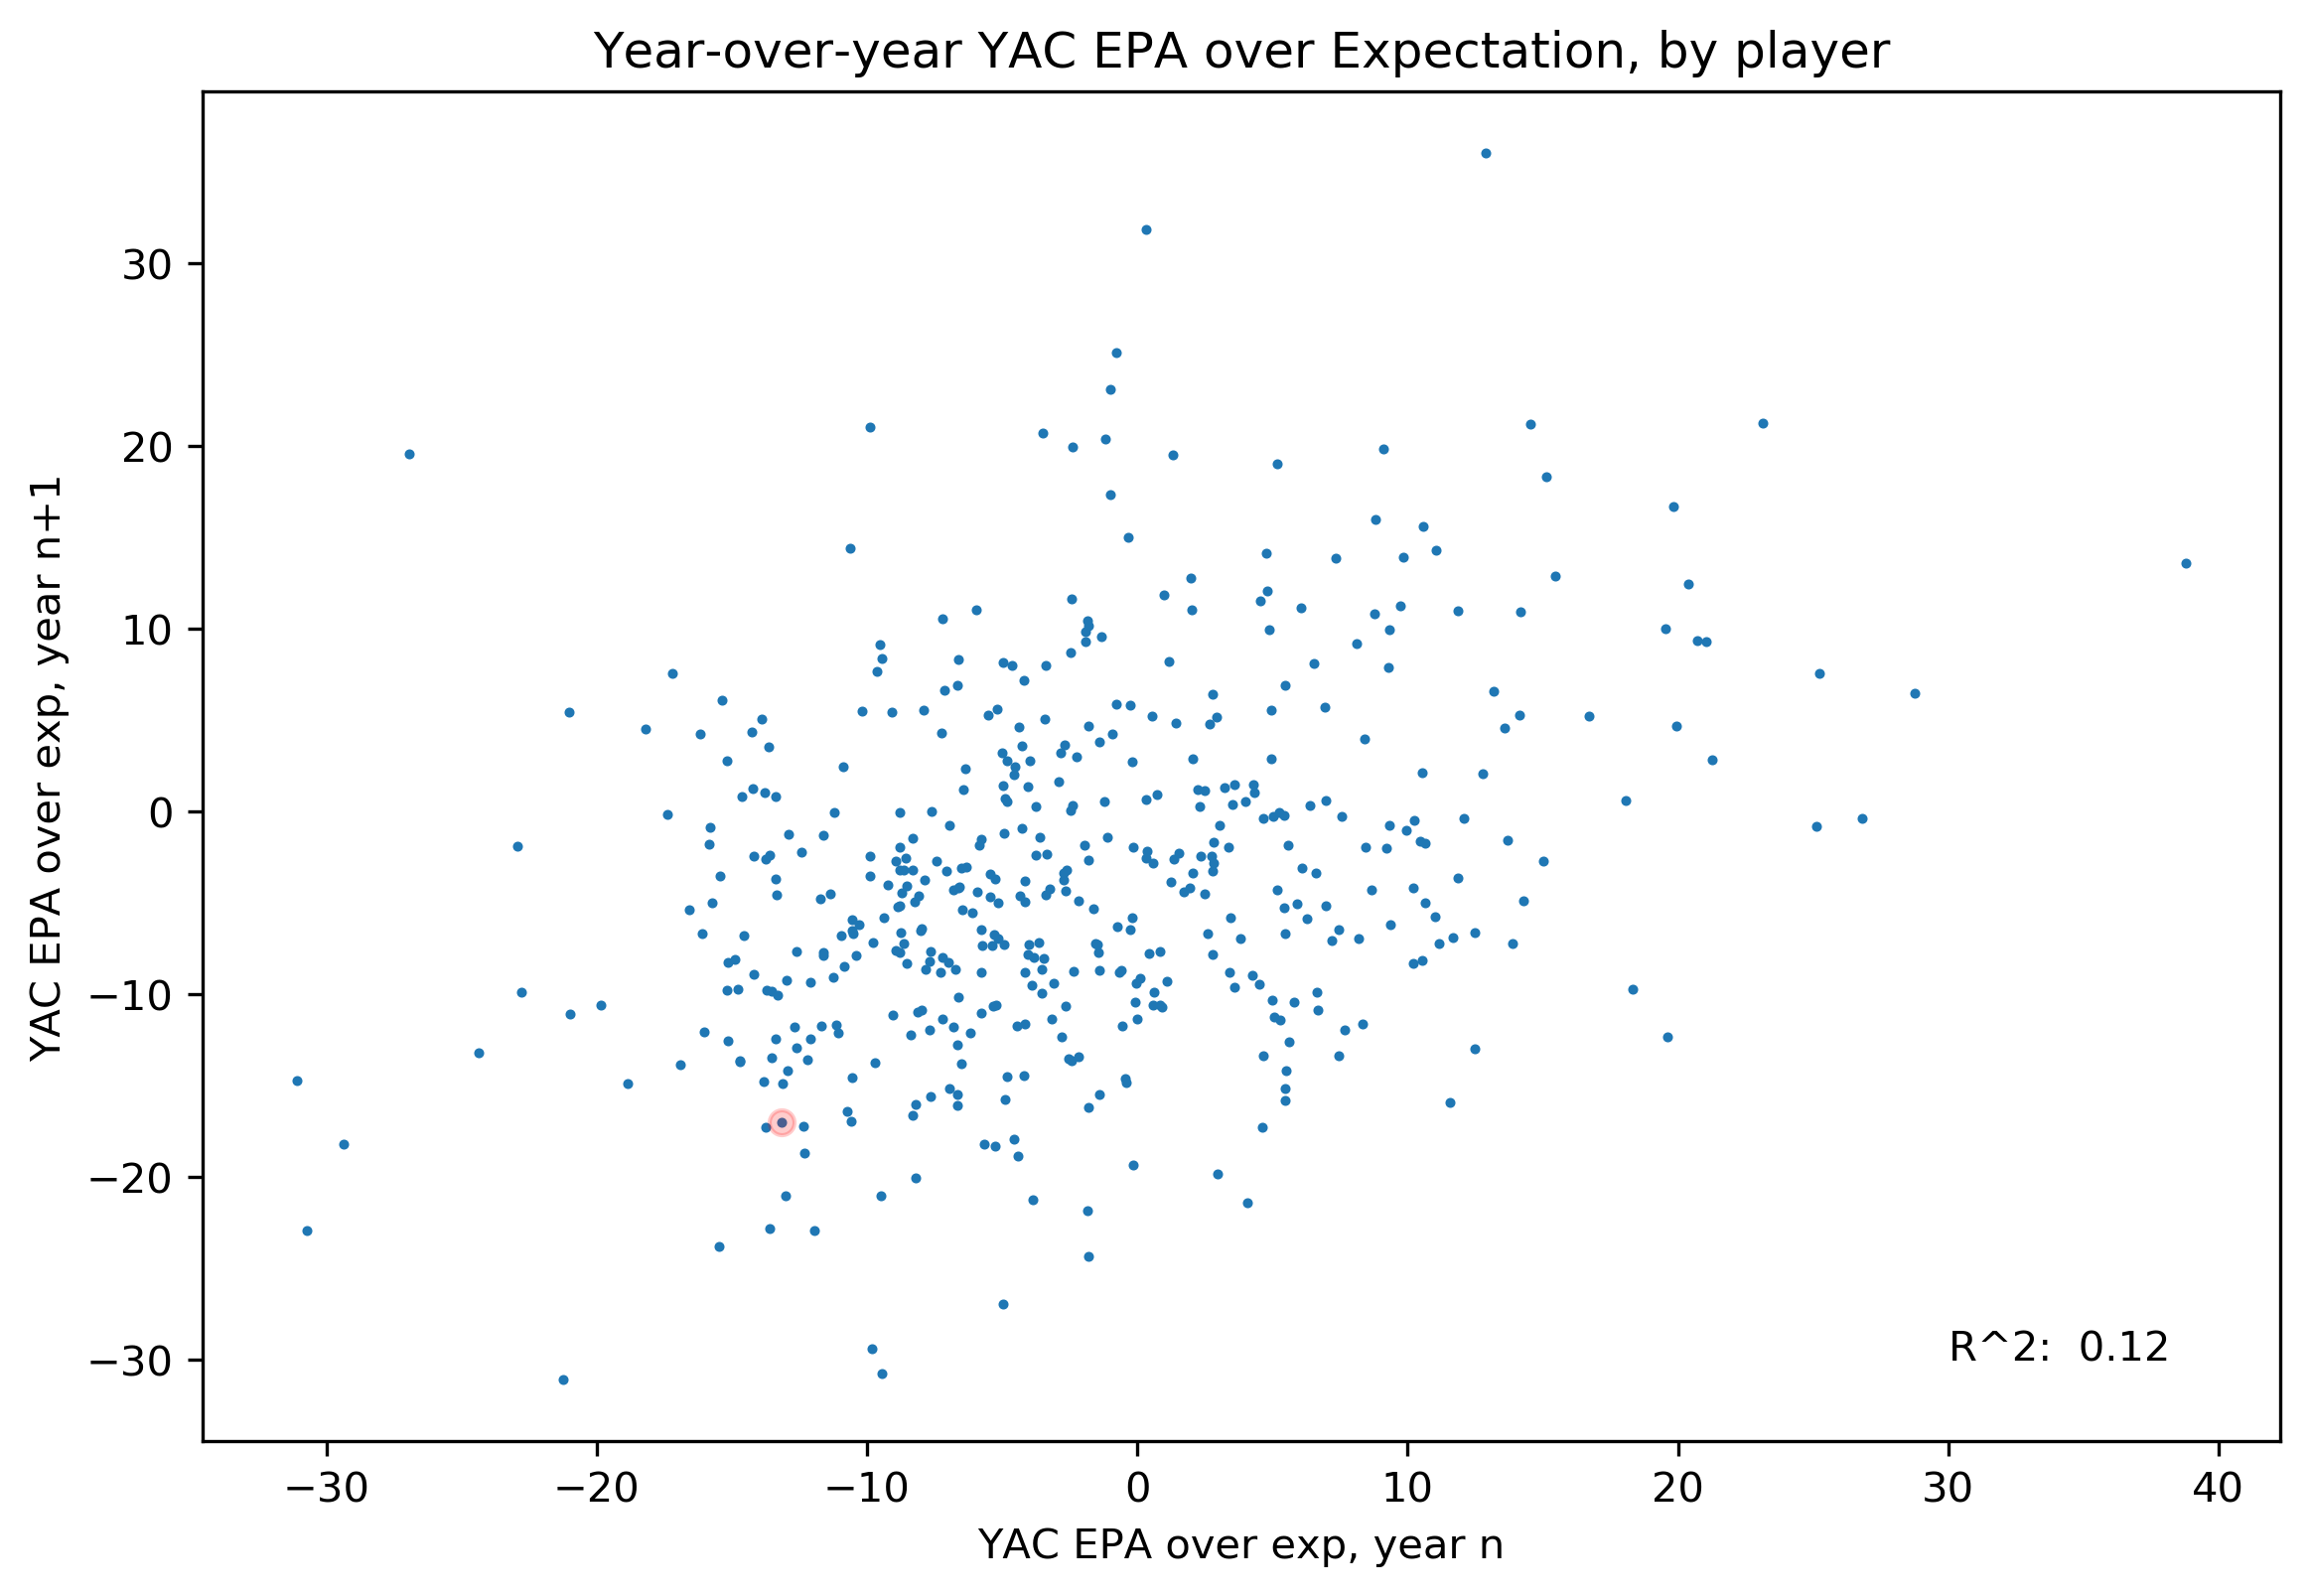

In [51]:
plt.figure(figsize=(9,6), dpi=300)
plt.title('Year-over-year YAC EPA over Expectation, by player')
plt.xlabel('YAC EPA over exp, year n')
plt.ylabel('YAC EPA over exp, year n+1')
plt.text(30, -30, f'R^2: {r_player_epa ** 2 : 0.2f}')
plt.scatter(player_epa_yoy_x, player_epa_yoy_y, 2)

# looking at random data points as a sanity check
player = 'J.Witten'
year = '2016'
year_next = str(int(year) + 1)
plt.scatter(yac_epa_player[year].loc[yac_epa_player[year].receiver == player].epa_oe, 
            yac_epa_player[year_next].loc[yac_epa_player[year_next].receiver == player].epa_oe, color='r', alpha=0.2);

In [52]:
# now lets look at xyac_mean_yardage
# select only complete passes with xyac_mean_yardage data

data_yac = {}

for _ , j in enumerate(pbp):
    YEAR = str(j)
    temp_pbp = pbp[YEAR]
    data_yac[YEAR] = temp_pbp.loc[(temp_pbp.xyac_mean_yardage.isna() == False) &
                                  (temp_pbp.complete_pass == 1)]

In [53]:
# team yac year over year correlation

yac_team = {}

for YEAR in range(2006, 2020):
    temp = data_yac[str(YEAR)].groupby('posteam', as_index=False).agg({'yards_after_catch': 'mean', 
                                                                       'xyac_mean_yardage': 'mean',
                                                                       'play_id': 'count'})
    temp['yac_oe'] = (temp['yards_after_catch'] - temp['xyac_mean_yardage']) * temp['play_id']
    yac_team[str(YEAR)] = temp
yac_team['2019']

,posteam,yards_after_catch,xyac_mean_yardage,play_id,yac_oe
0,ARI,5.386819,5.812838,349,-148.680389
1,ATL,4.267416,4.998364,445,-325.271786
2,BAL,5.164430,4.990182,298,51.925784
3,BUF,5.272152,5.323262,316,-16.150812
4,CAR,5.417112,5.335332,374,30.585699
5,CHI,4.308123,5.769337,357,-521.653474
6,CIN,5.037356,4.968803,348,23.856491
7,CLE,6.003289,5.576280,304,129.811026
8,DAL,4.973545,4.989061,378,-5.865218
9,DEN,5.632450,5.745016,302,-33.994744


In [54]:
team_yac_yoy_x = []
team_yac_yoy_y = []
for i in range(2006, 2019):
    YEAR = str(i)
    temp = yac_team[YEAR]
    temp_next = yac_team[str(i+1)]
    for j in range(32):
        x = float(temp.iloc[j].yac_oe)
        y = float(temp_next.iloc[j].yac_oe)
        assert temp.iloc[j].posteam == temp_next.iloc[j].posteam
        team_yac_yoy_x.append(x)
        team_yac_yoy_y.append(y)

In [56]:
m, b, r_team_yac, p, std_error = stats.linregress(team_yac_yoy_x, team_yac_yoy_y)
print(m, b)
print(r_team_yac**2)

0.33074098210361924 12.178451768111206
0.10669986395552966


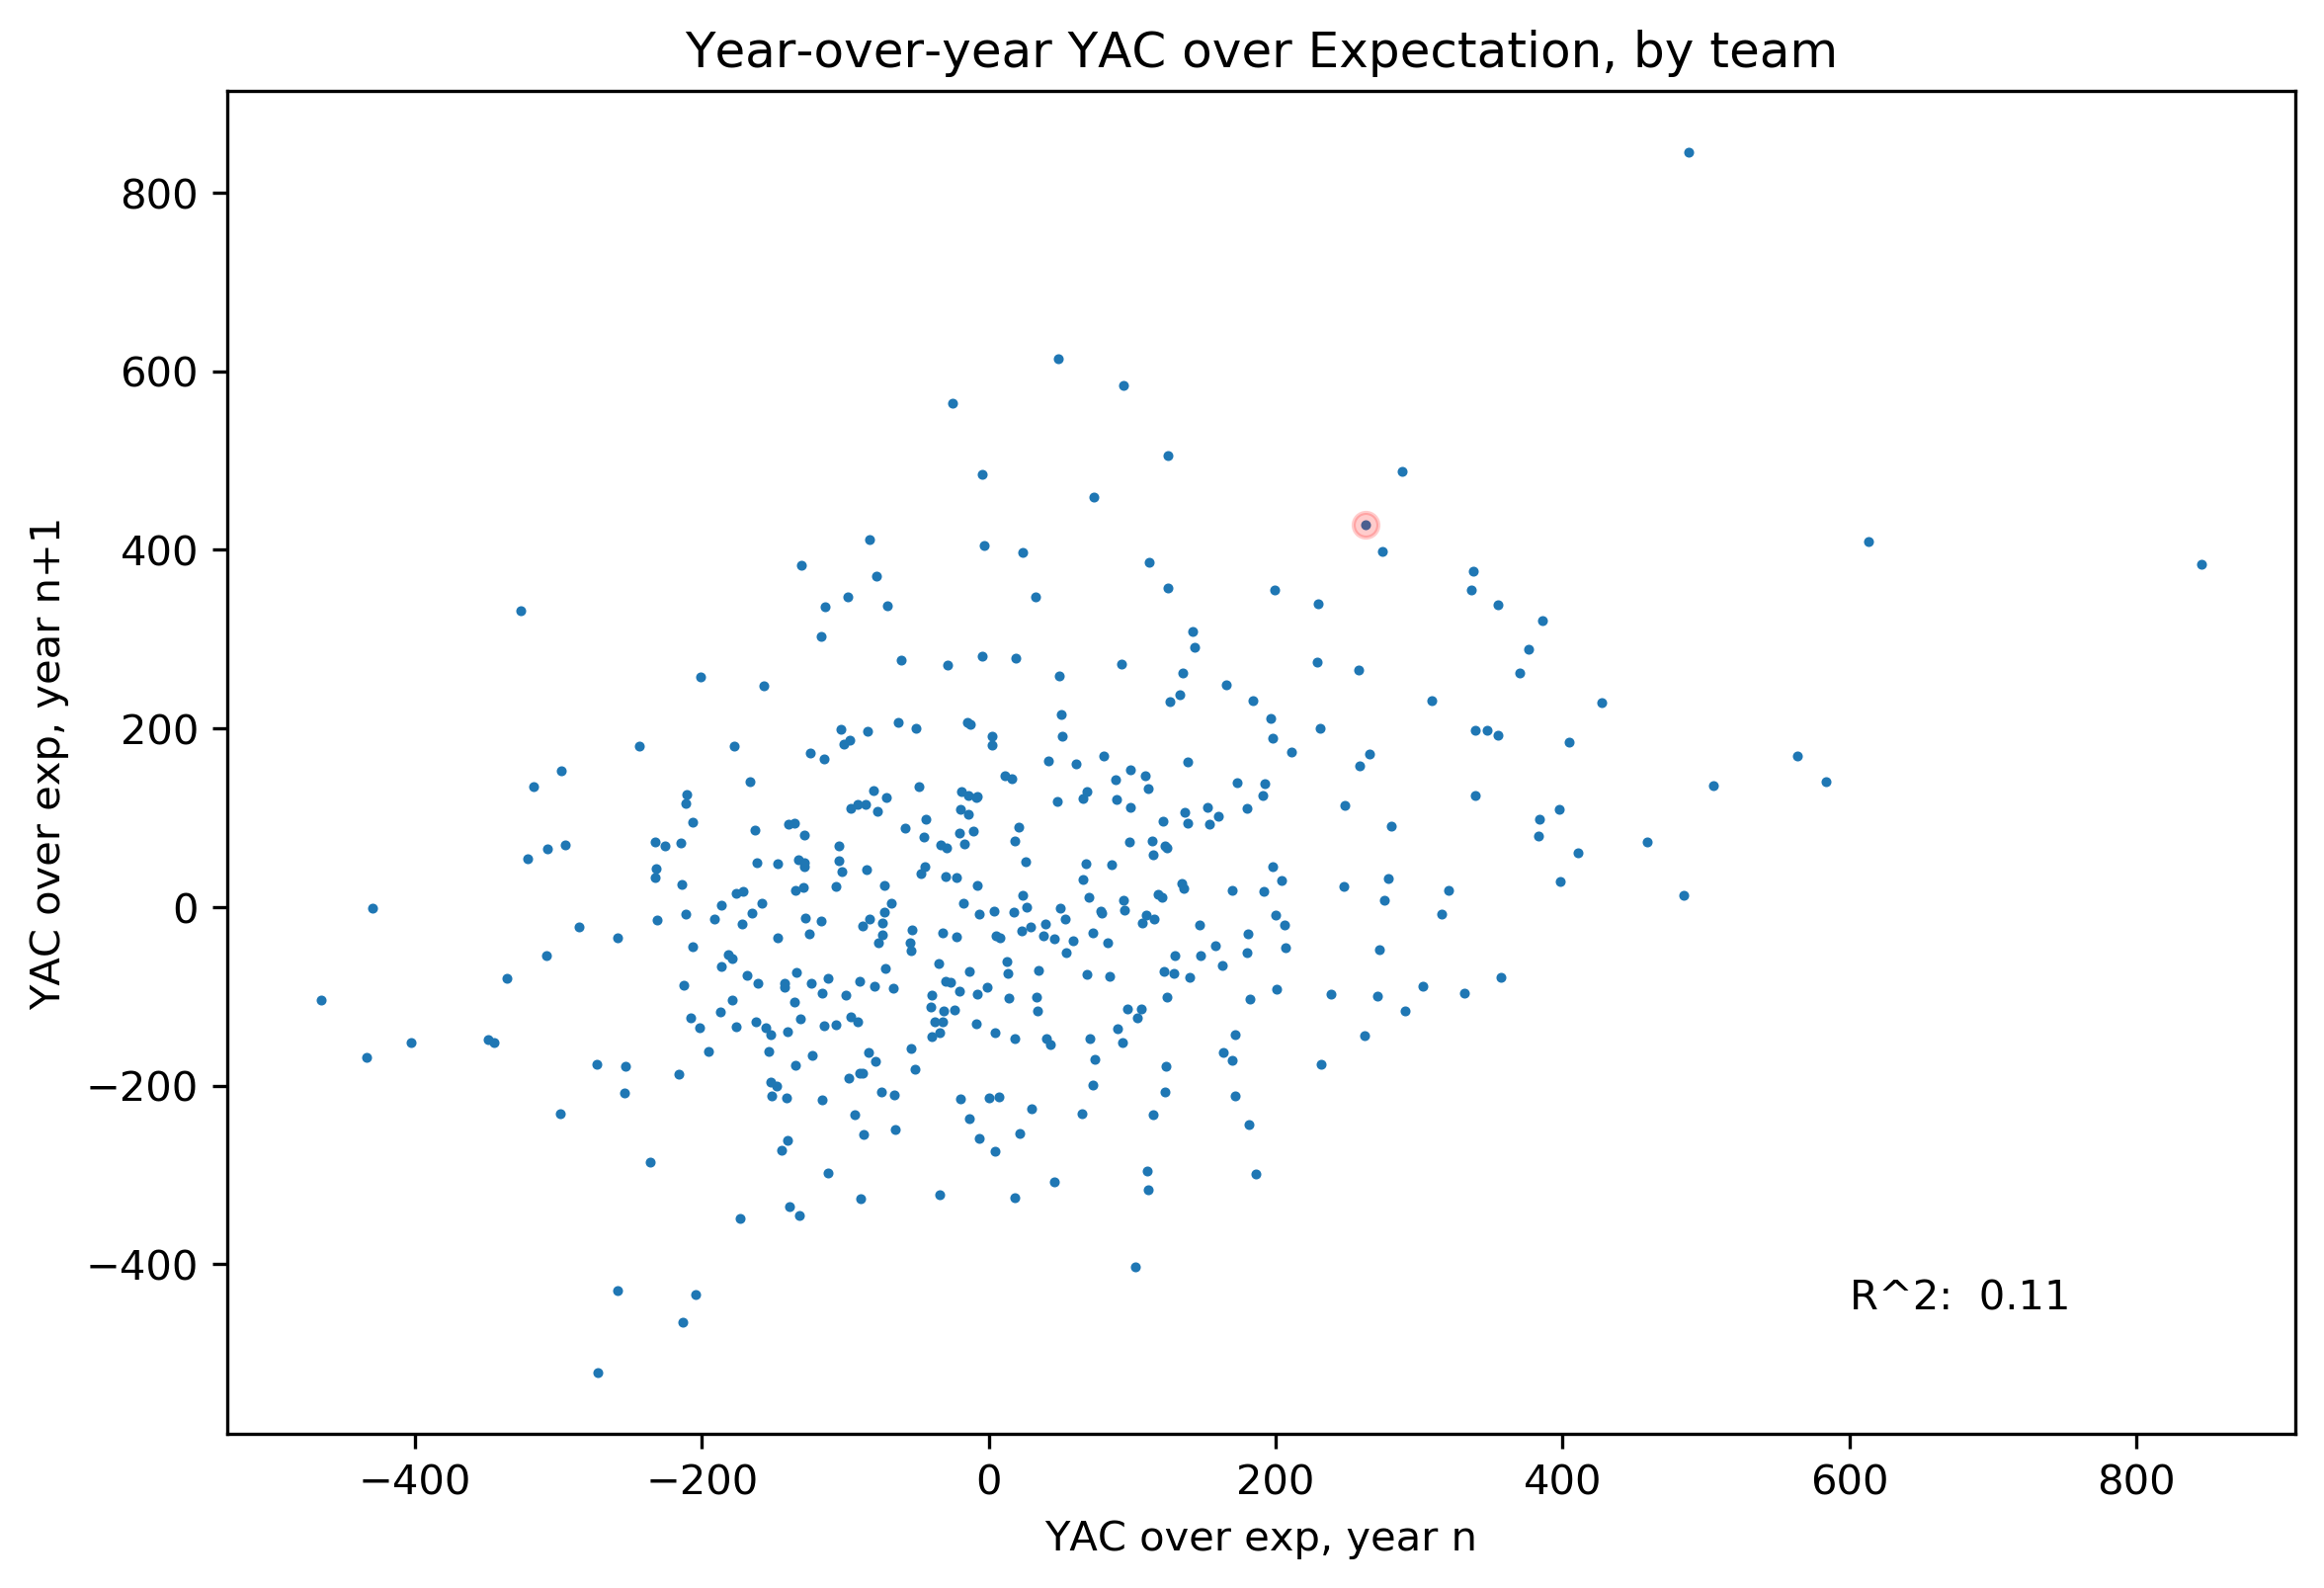

In [58]:
plt.figure(figsize=(9,6), dpi=300)
plt.title('Year-over-year YAC over Expectation, by team')
plt.xlabel('YAC over exp, year n')
plt.ylabel('YAC over exp, year n+1')
plt.text(600, -450, f'R^2: {r_team_yac ** 2 : 0.2f}')
plt.scatter(team_yac_yoy_x, team_yac_yoy_y, 2)

# looking at random data points as a sanity check
team = 'GB'
year = '2010'
year_next = str(int(year) + 1)
plt.scatter(yac_team[year].loc[yac_team[year].posteam == team].yac_oe, 
            yac_team[year_next].loc[yac_team[year_next].posteam == team].yac_oe, color='r', alpha=0.2);

In [59]:
# player yac year over year correlation

yac_player = {}

for YEAR in range(2006, 2020):
    temp = data_yac[str(YEAR)].groupby(['receiver', 'posteam'], as_index=False).agg({'yards_after_catch': 'mean', 
                                                                                     'xyac_mean_yardage': 'mean',
                                                                                     'play_id': 'count'})
    temp['yac_oe'] = (temp['yards_after_catch'] - temp['xyac_mean_yardage']) * temp['play_id']
    temp = temp.loc[temp.play_id > 50]
    yac_player[str(YEAR)] = temp
yac_player['2019']

,receiver,posteam,yards_after_catch,xyac_mean_yardage,play_id,yac_oe
5,A.Brown,TEN,9.314815,4.962167,54,235.042986
8,A.Cooper,DAL,3.200000,4.410524,75,-90.789324
11,A.Ekeler,LAC,10.217391,6.887176,92,306.379772
16,A.Hooper,ATL,4.652778,4.927666,72,-19.791947
23,A.Jones,GB,8.851852,7.334105,54,81.958337
24,A.Kamara,NO,6.662921,7.330639,89,-59.426847
27,A.Miller,CHI,4.254902,5.296491,51,-53.121051
31,A.Robinson,CHI,2.924731,4.877208,93,-181.580305
55,C.Beasley,BUF,5.157143,4.413832,70,52.031727
67,C.Godwin,TB,7.036585,5.024582,82,164.984293


In [60]:
player_yac_yoy_x = []
player_yac_yoy_y = []
for i in range(2006, 2019):
    YEAR = str(i)
    temp = yac_player[YEAR]
    temp_next = yac_player[str(i+1)]
    receivers = temp.receiver.unique()
    receivers_next = temp_next.receiver.unique()
    for player in receivers:
        if player not in receivers_next:
            continue
        x = temp.loc[temp.receiver == player]['yac_oe']
        if len(x) > 1:
            continue
        y = temp_next.loc[temp_next.receiver == player]['yac_oe']
        if len(y) > 1:
            continue
        x = float(x)
        y = float(y)
        player_yac_yoy_x.append(x)
        player_yac_yoy_y.append(y)

In [62]:
m, b, r_player_yac, p, std_error = stats.linregress(player_yac_yoy_x, player_yac_yoy_y)
print(m, b)
print(r_player_yac**2)

0.37975153267070155 -4.741898175327849
0.14945362080950983


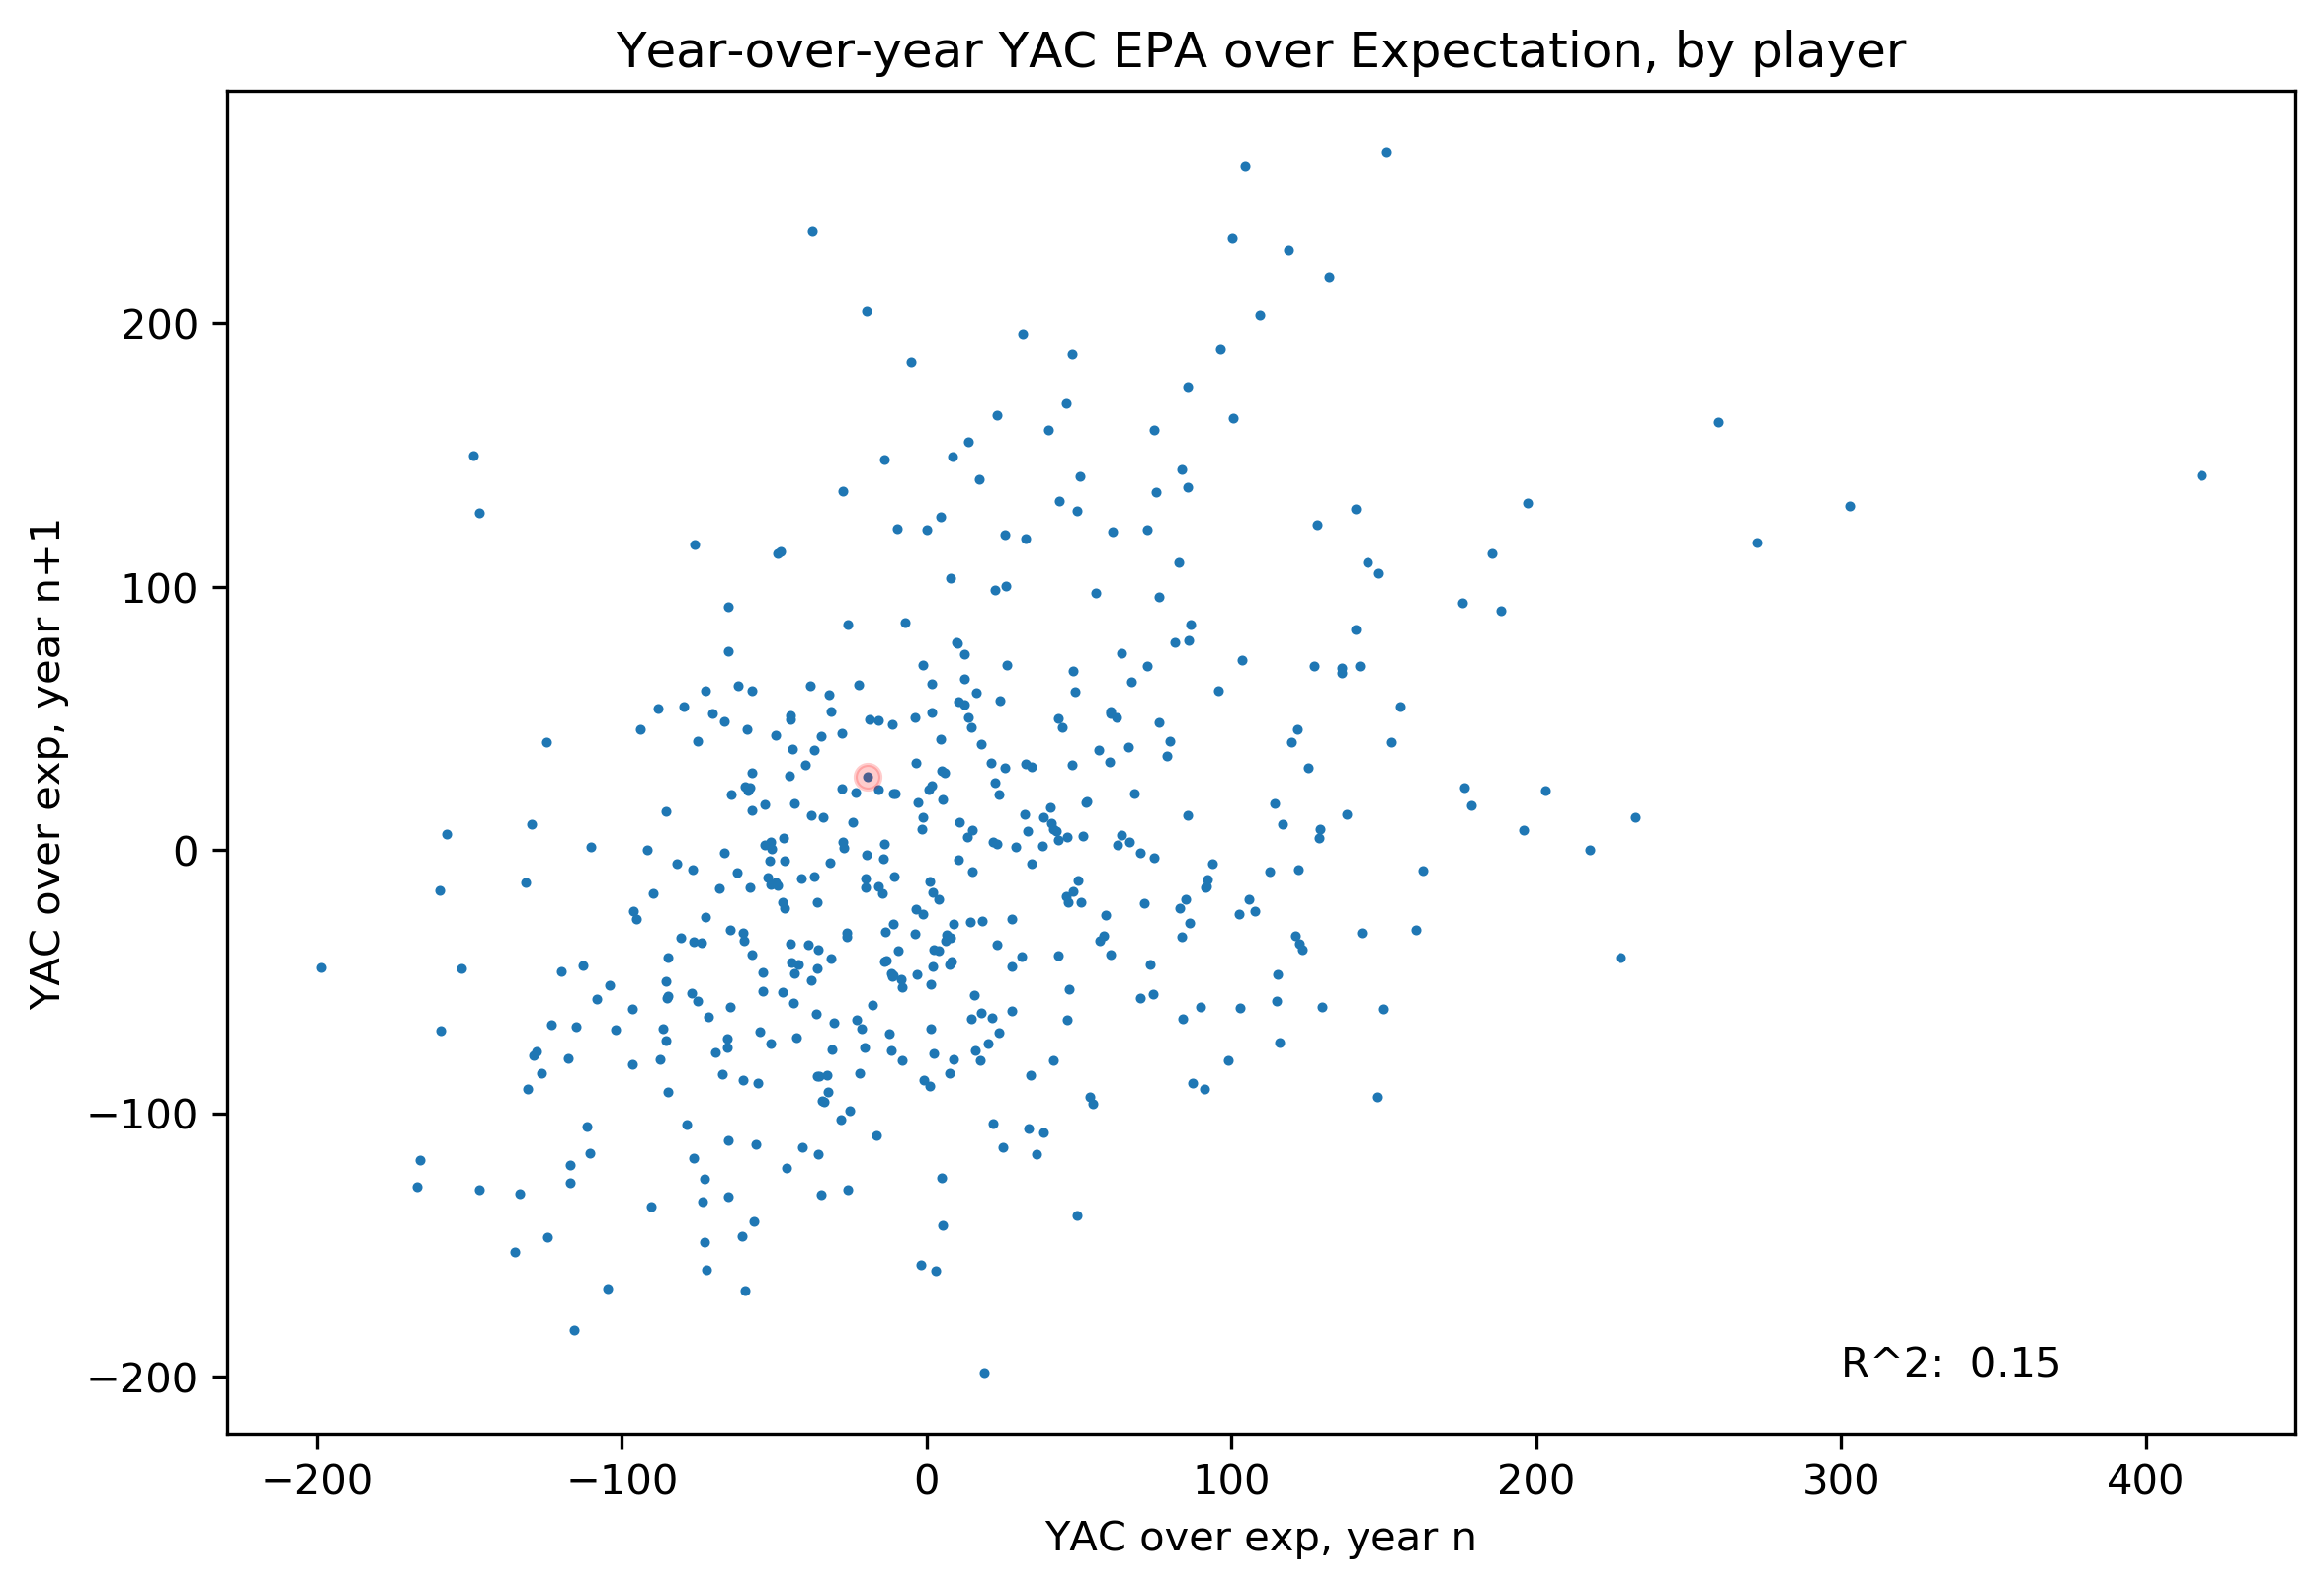

In [64]:
plt.figure(figsize=(9,6), dpi=300)
plt.title('Year-over-year YAC EPA over Expectation, by player')
plt.xlabel('YAC over exp, year n')
plt.ylabel('YAC over exp, year n+1')
plt.text(300, -200, f'R^2: {r_player_yac ** 2 : 0.2f}')
plt.scatter(player_yac_yoy_x, player_yac_yoy_y, 2)

# looking at random data points as a sanity check
player = 'T.Owens'
year = '2006'
year_next = str(int(year) + 1)
plt.scatter(yac_player[year].loc[yac_player[year].receiver == player].yac_oe, 
            yac_player[year_next].loc[yac_player[year_next].receiver == player].yac_oe, color='r', alpha=0.2);

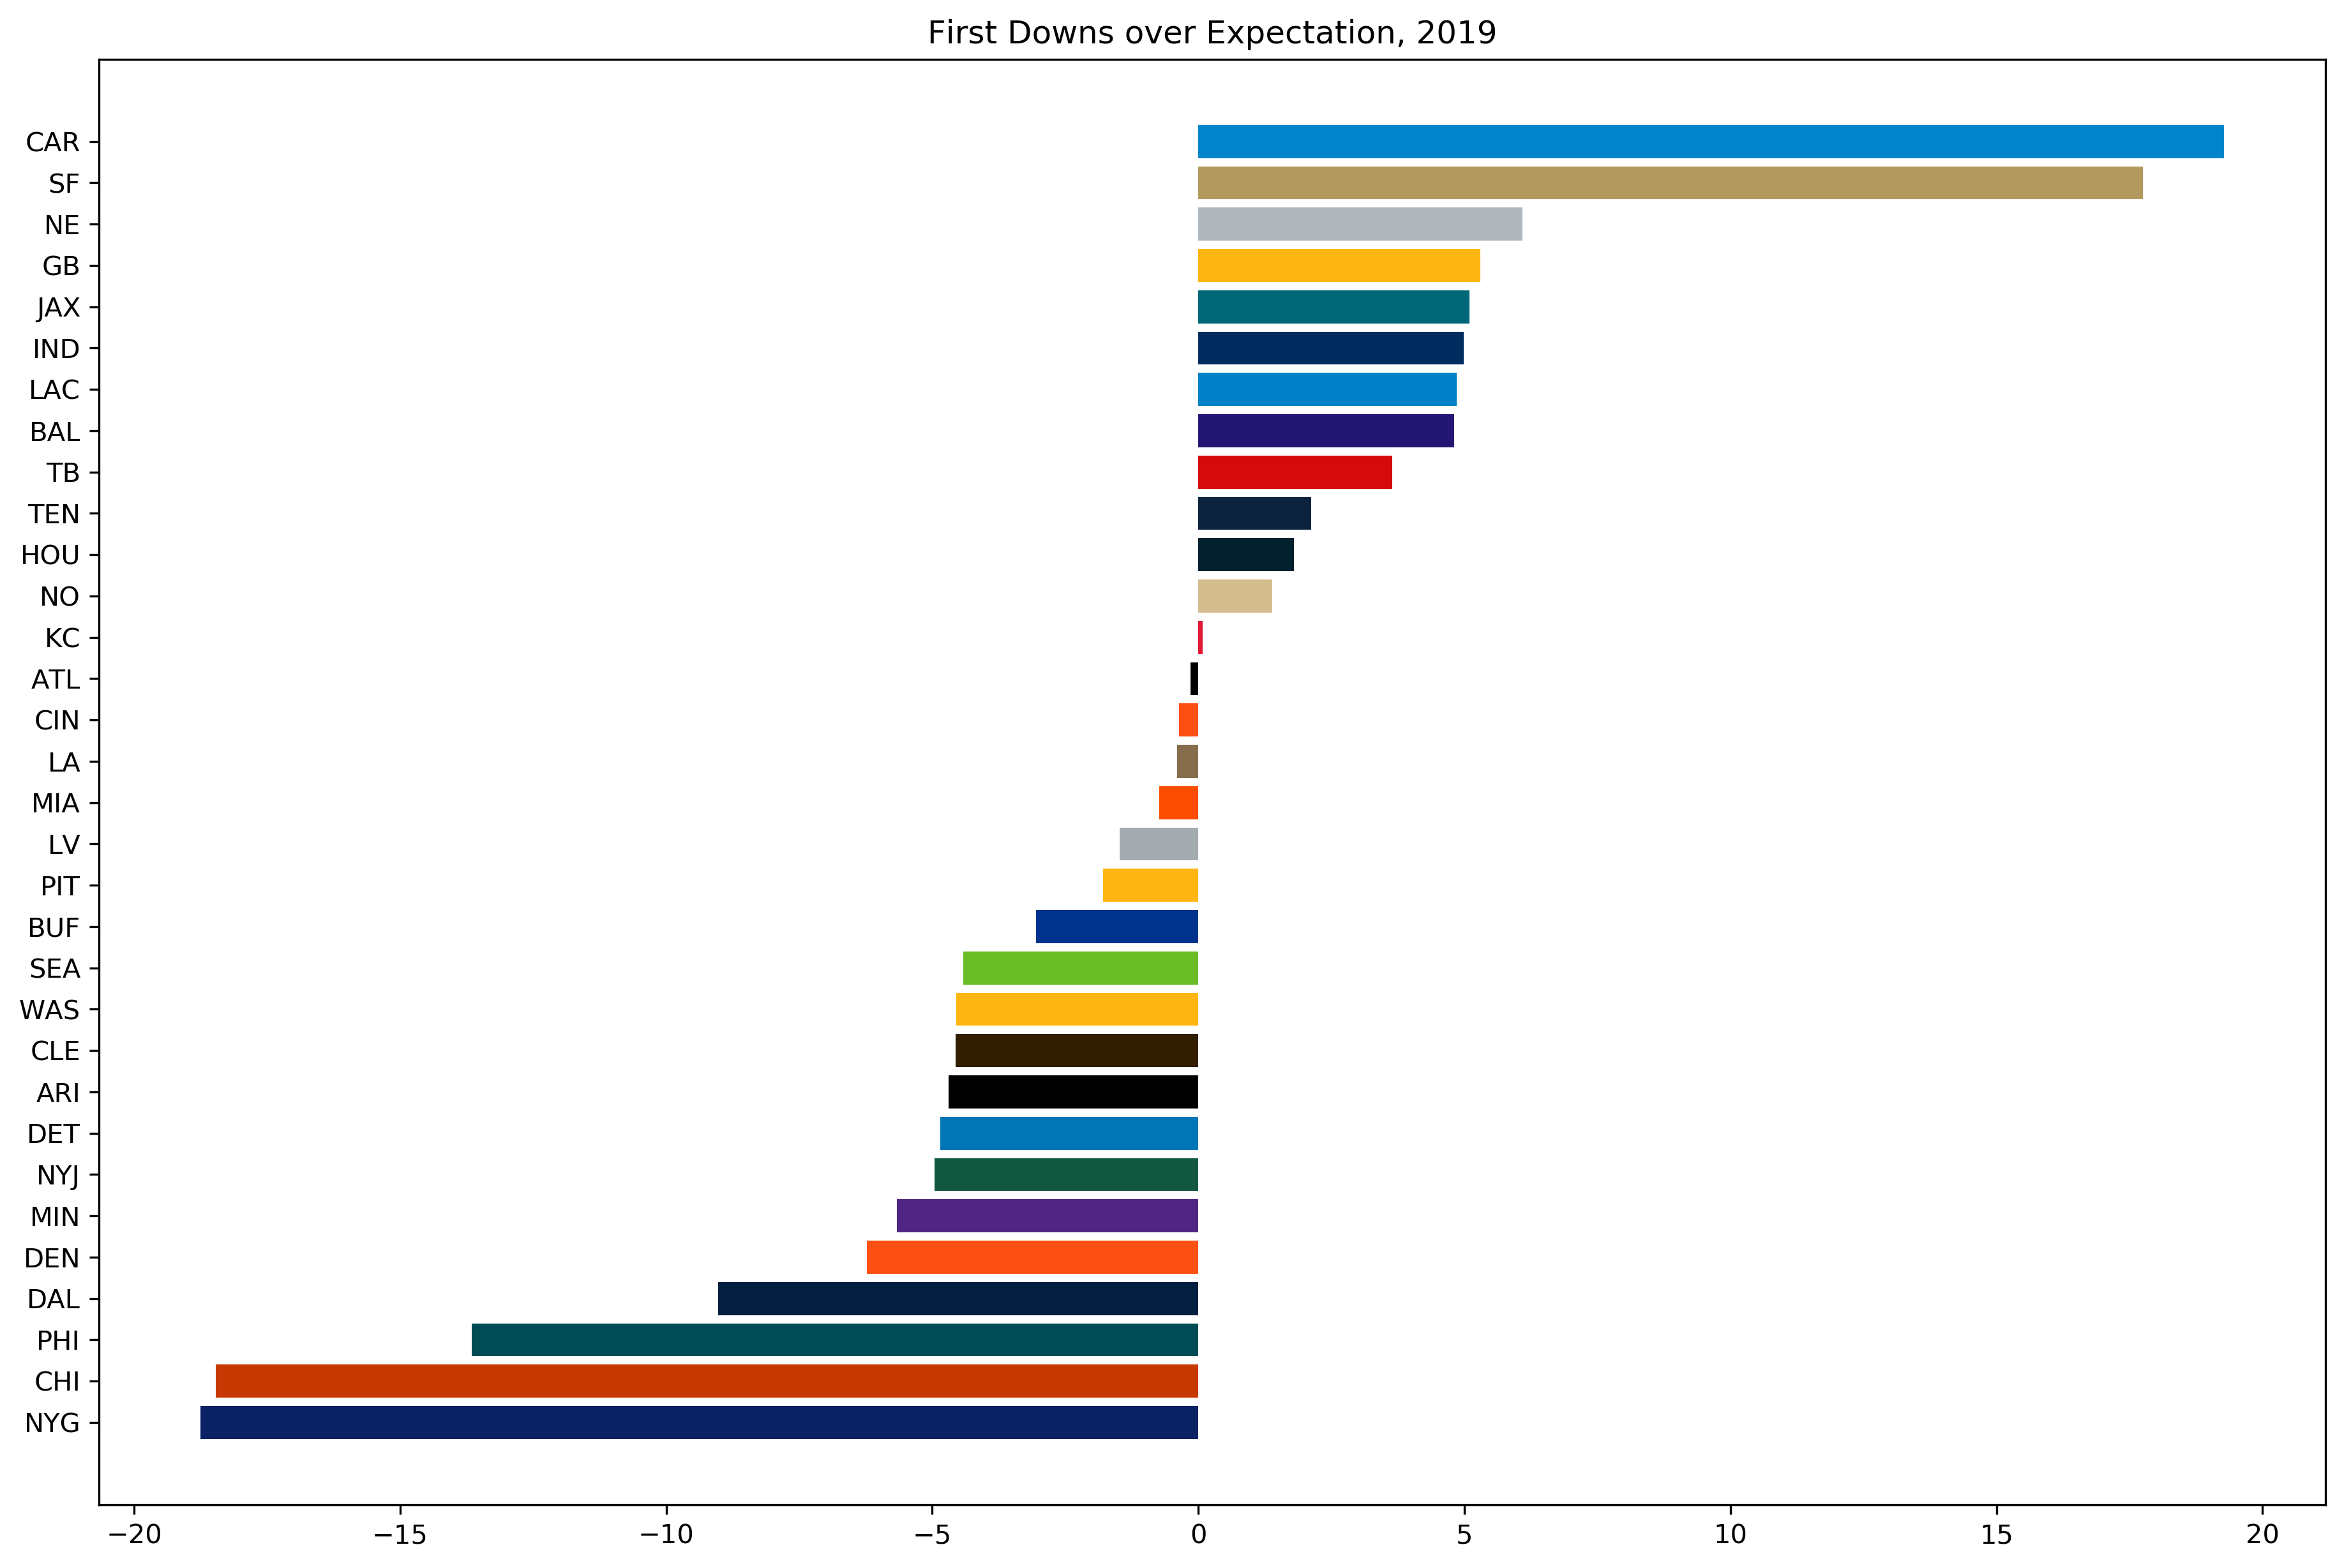

In [65]:
# plot 2019 
fdoe_team['2019'] = fdoe_team['2019'].sort_values('fd_oe', axis=0)
pos = np.arange(32)
col = [team_colors_primary[team] for team in fdoe_team['2019']['posteam']]
plt.figure(figsize=(15,10), dpi=300)
plt.barh(pos, width=fdoe_team['2019']['fd_oe'], tick_label=fdoe_team['2019']['posteam'], color=col)
plt.title('First Downs over Expectation, 2019')
plt.savefig('fdoe_2019.png')
plt.show()

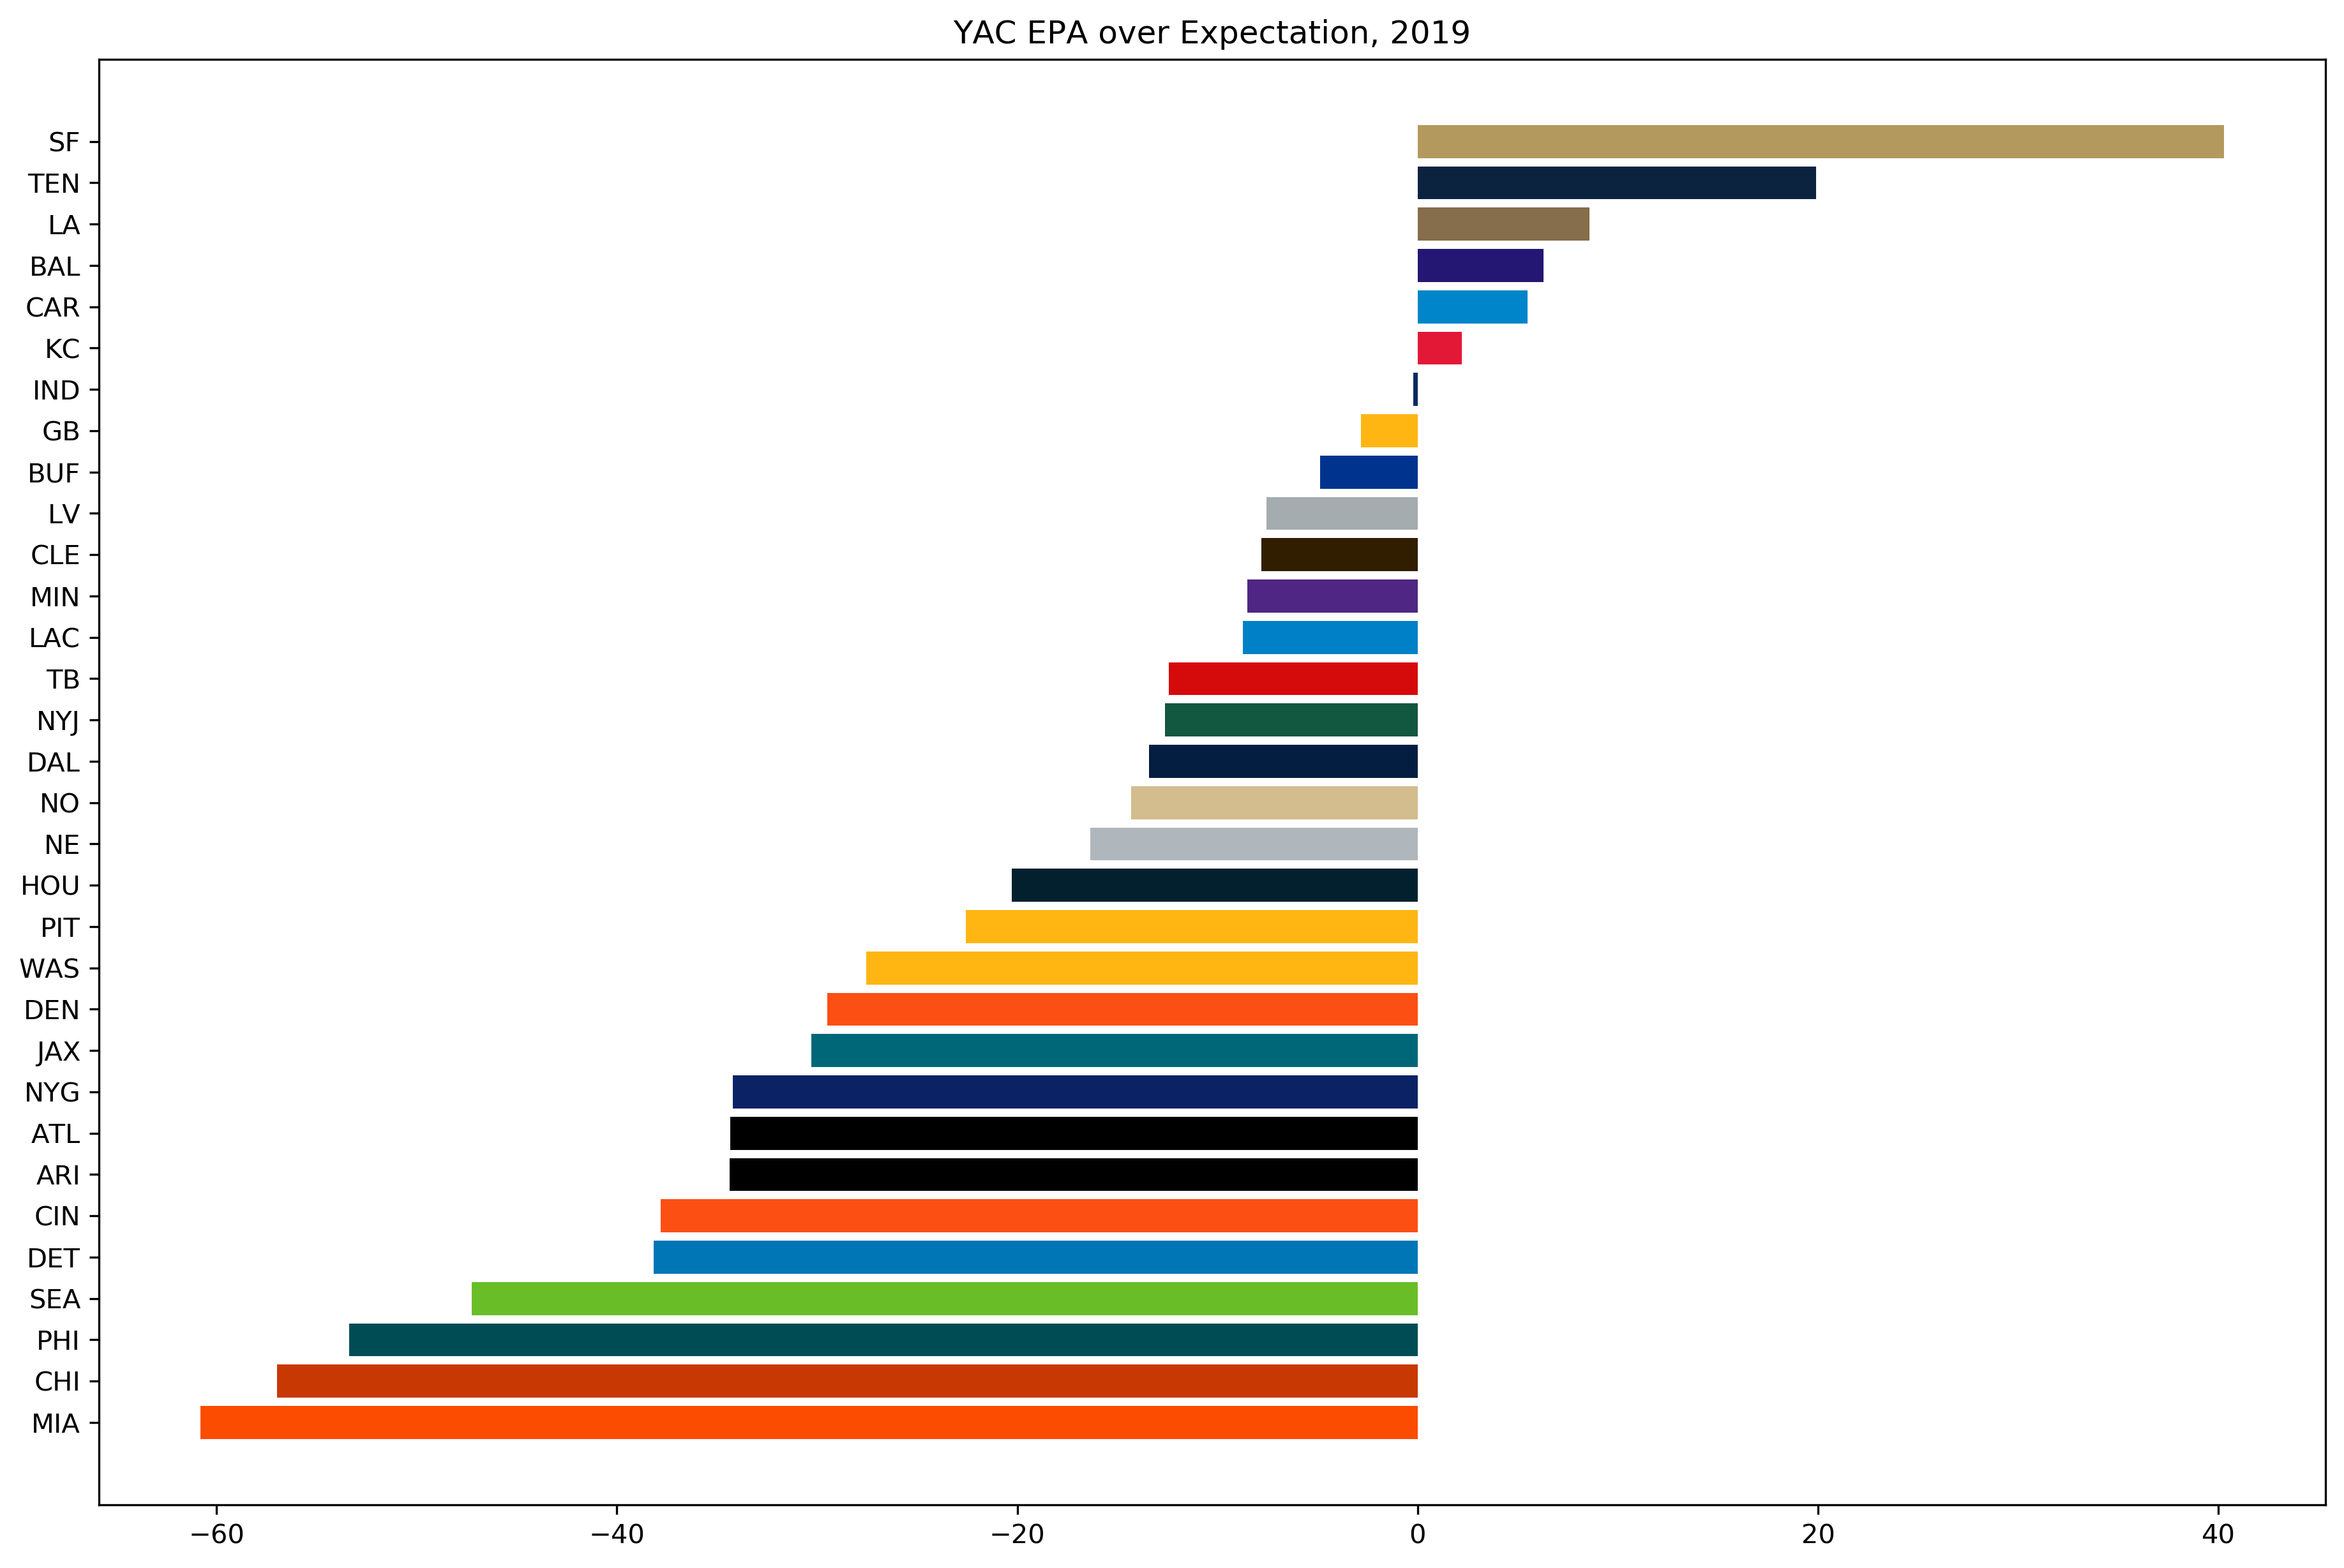

In [66]:
yac_epa_team['2019'] = yac_epa_team['2019'].sort_values('epa_oe', axis=0)
pos = np.arange(32)
col = [team_colors_primary[team] for team in yac_epa_team['2019']['posteam']]
plt.figure(figsize=(15,10), dpi=300)
plt.barh(pos, width=yac_epa_team['2019']['epa_oe'], tick_label=yac_epa_team['2019']['posteam'], color=col)
plt.title('YAC EPA over Expectation, 2019')
plt.savefig('yac_epa_oe_2019.png')
plt.show()

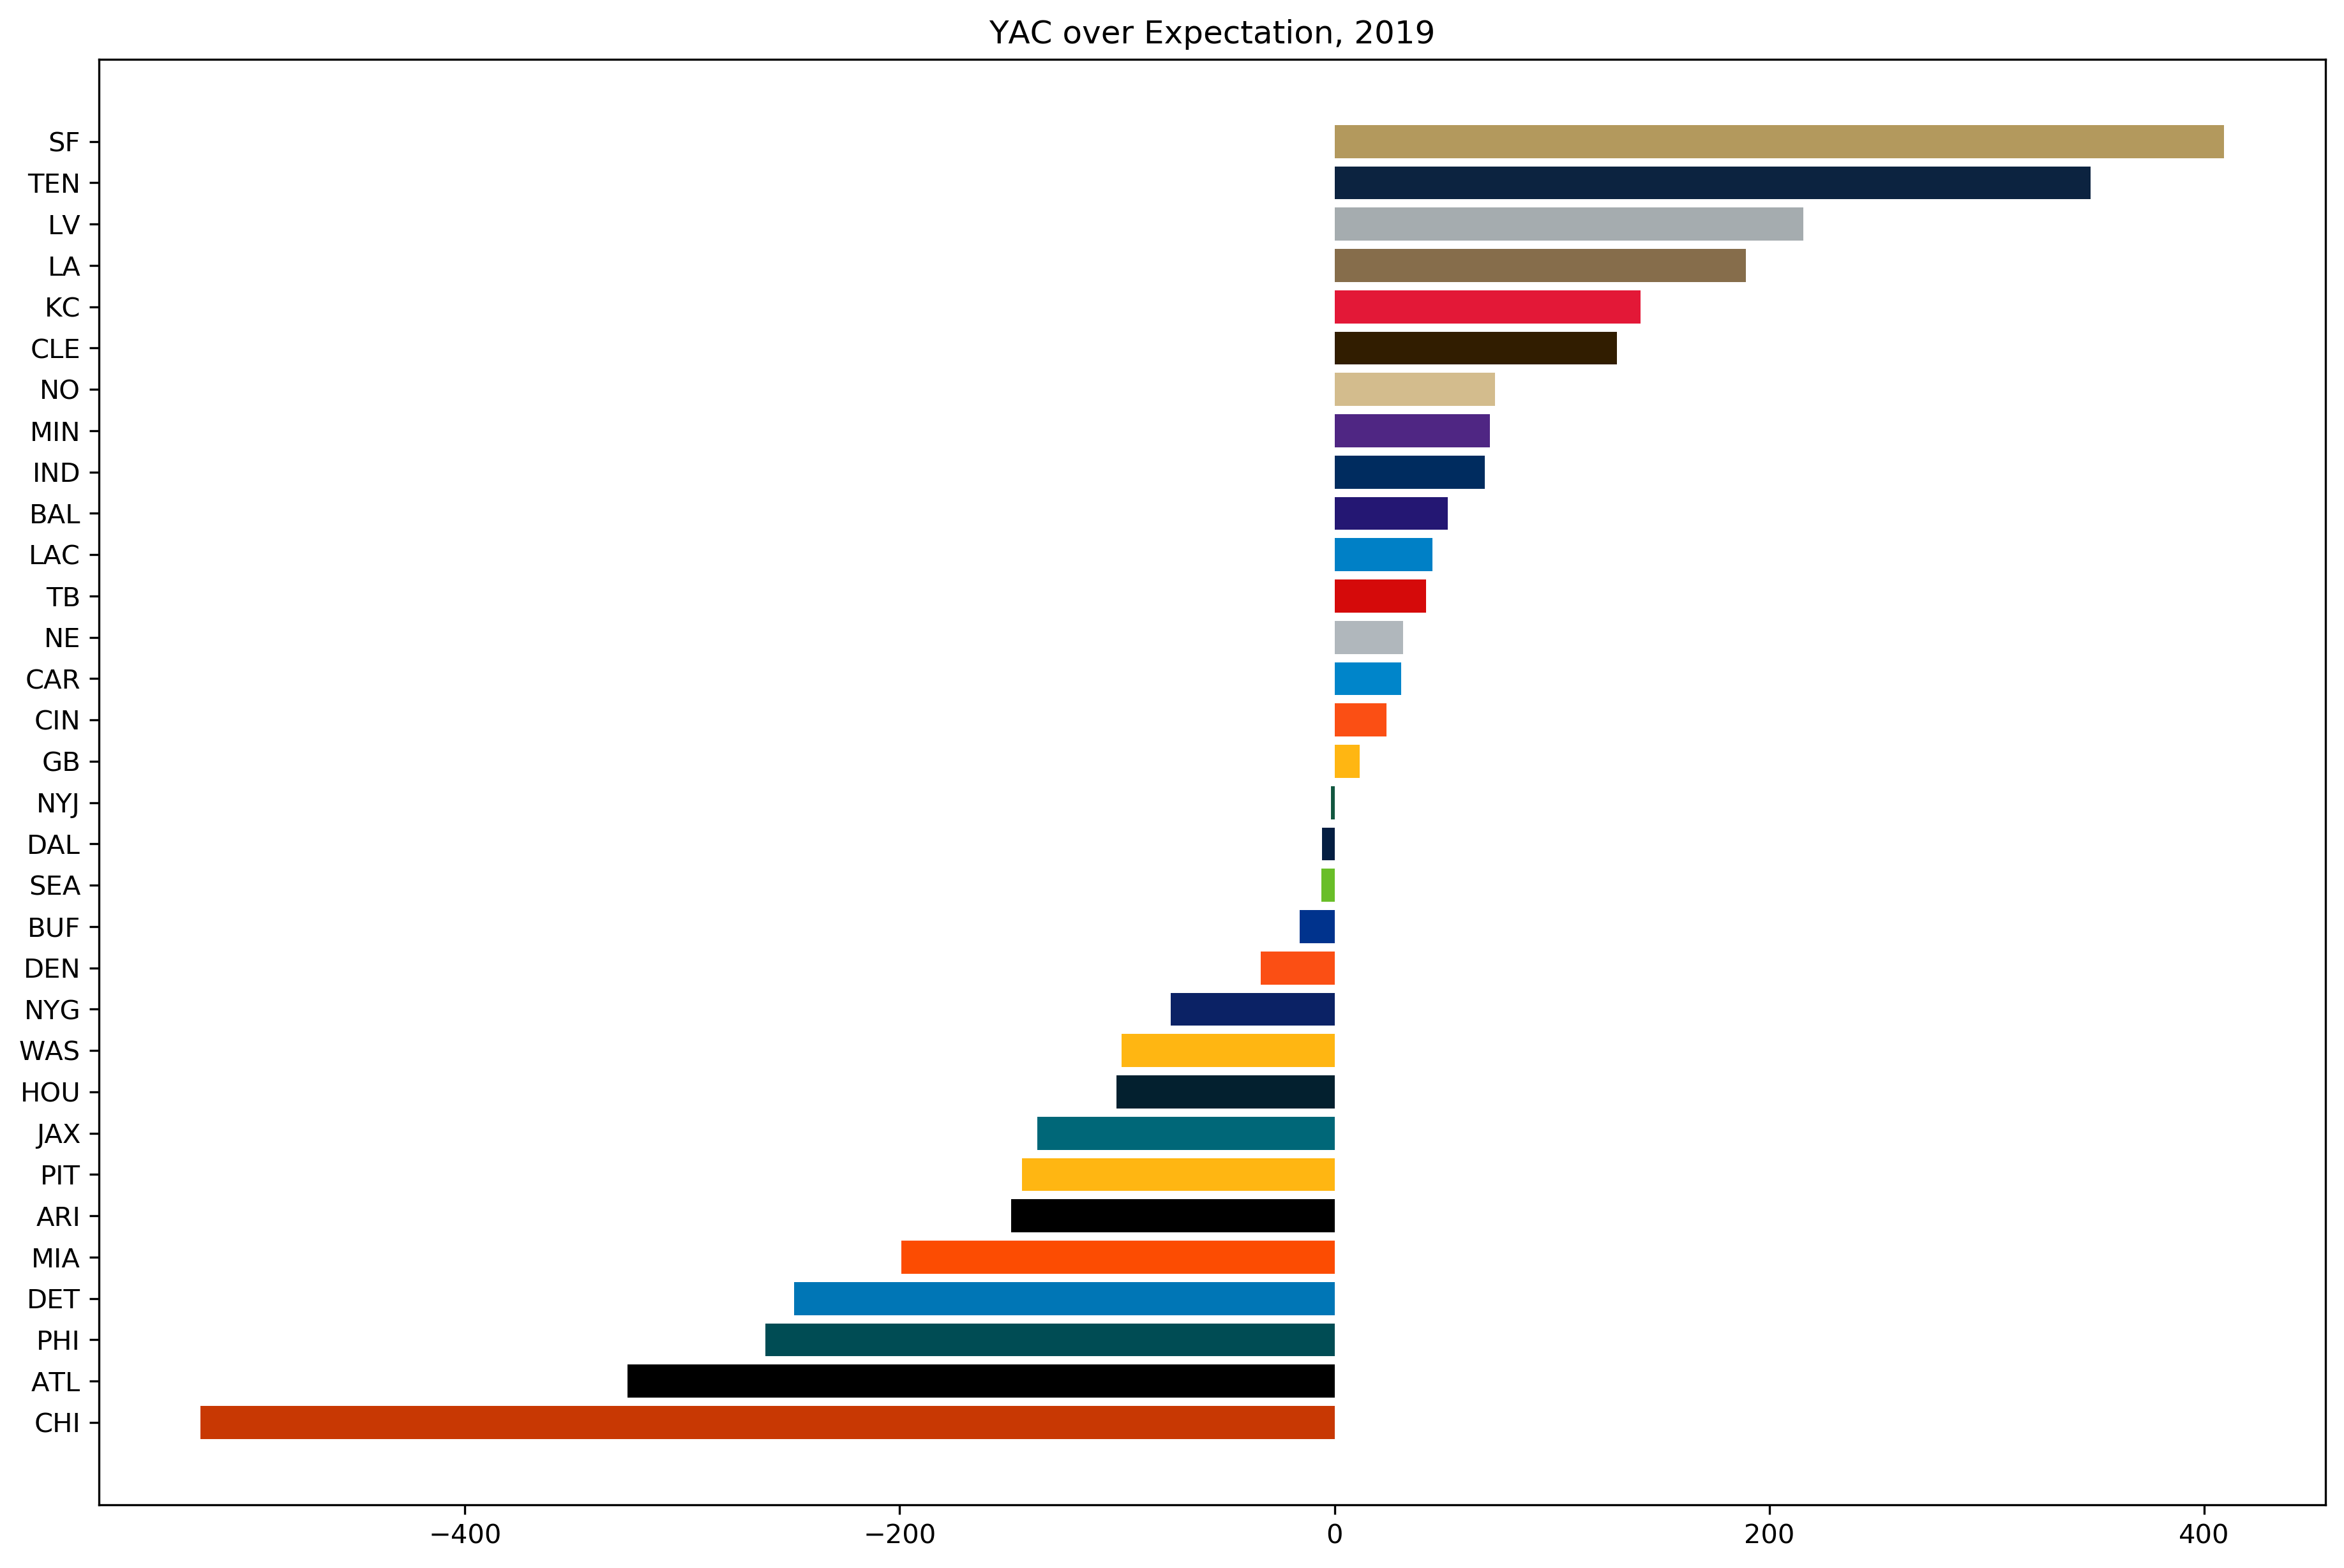

In [67]:
yac_team['2019'] = yac_team['2019'].sort_values('yac_oe', axis=0)
pos = np.arange(32)
col = [team_colors_primary[team] for team in yac_team['2019']['posteam']]
plt.figure(figsize=(15,10), dpi=300)
plt.barh(pos, width=yac_team['2019']['yac_oe'], tick_label=yac_team['2019']['posteam'], color=col)
plt.title('YAC over Expectation, 2019')
plt.savefig('yac_oe_2019.png')
plt.show()

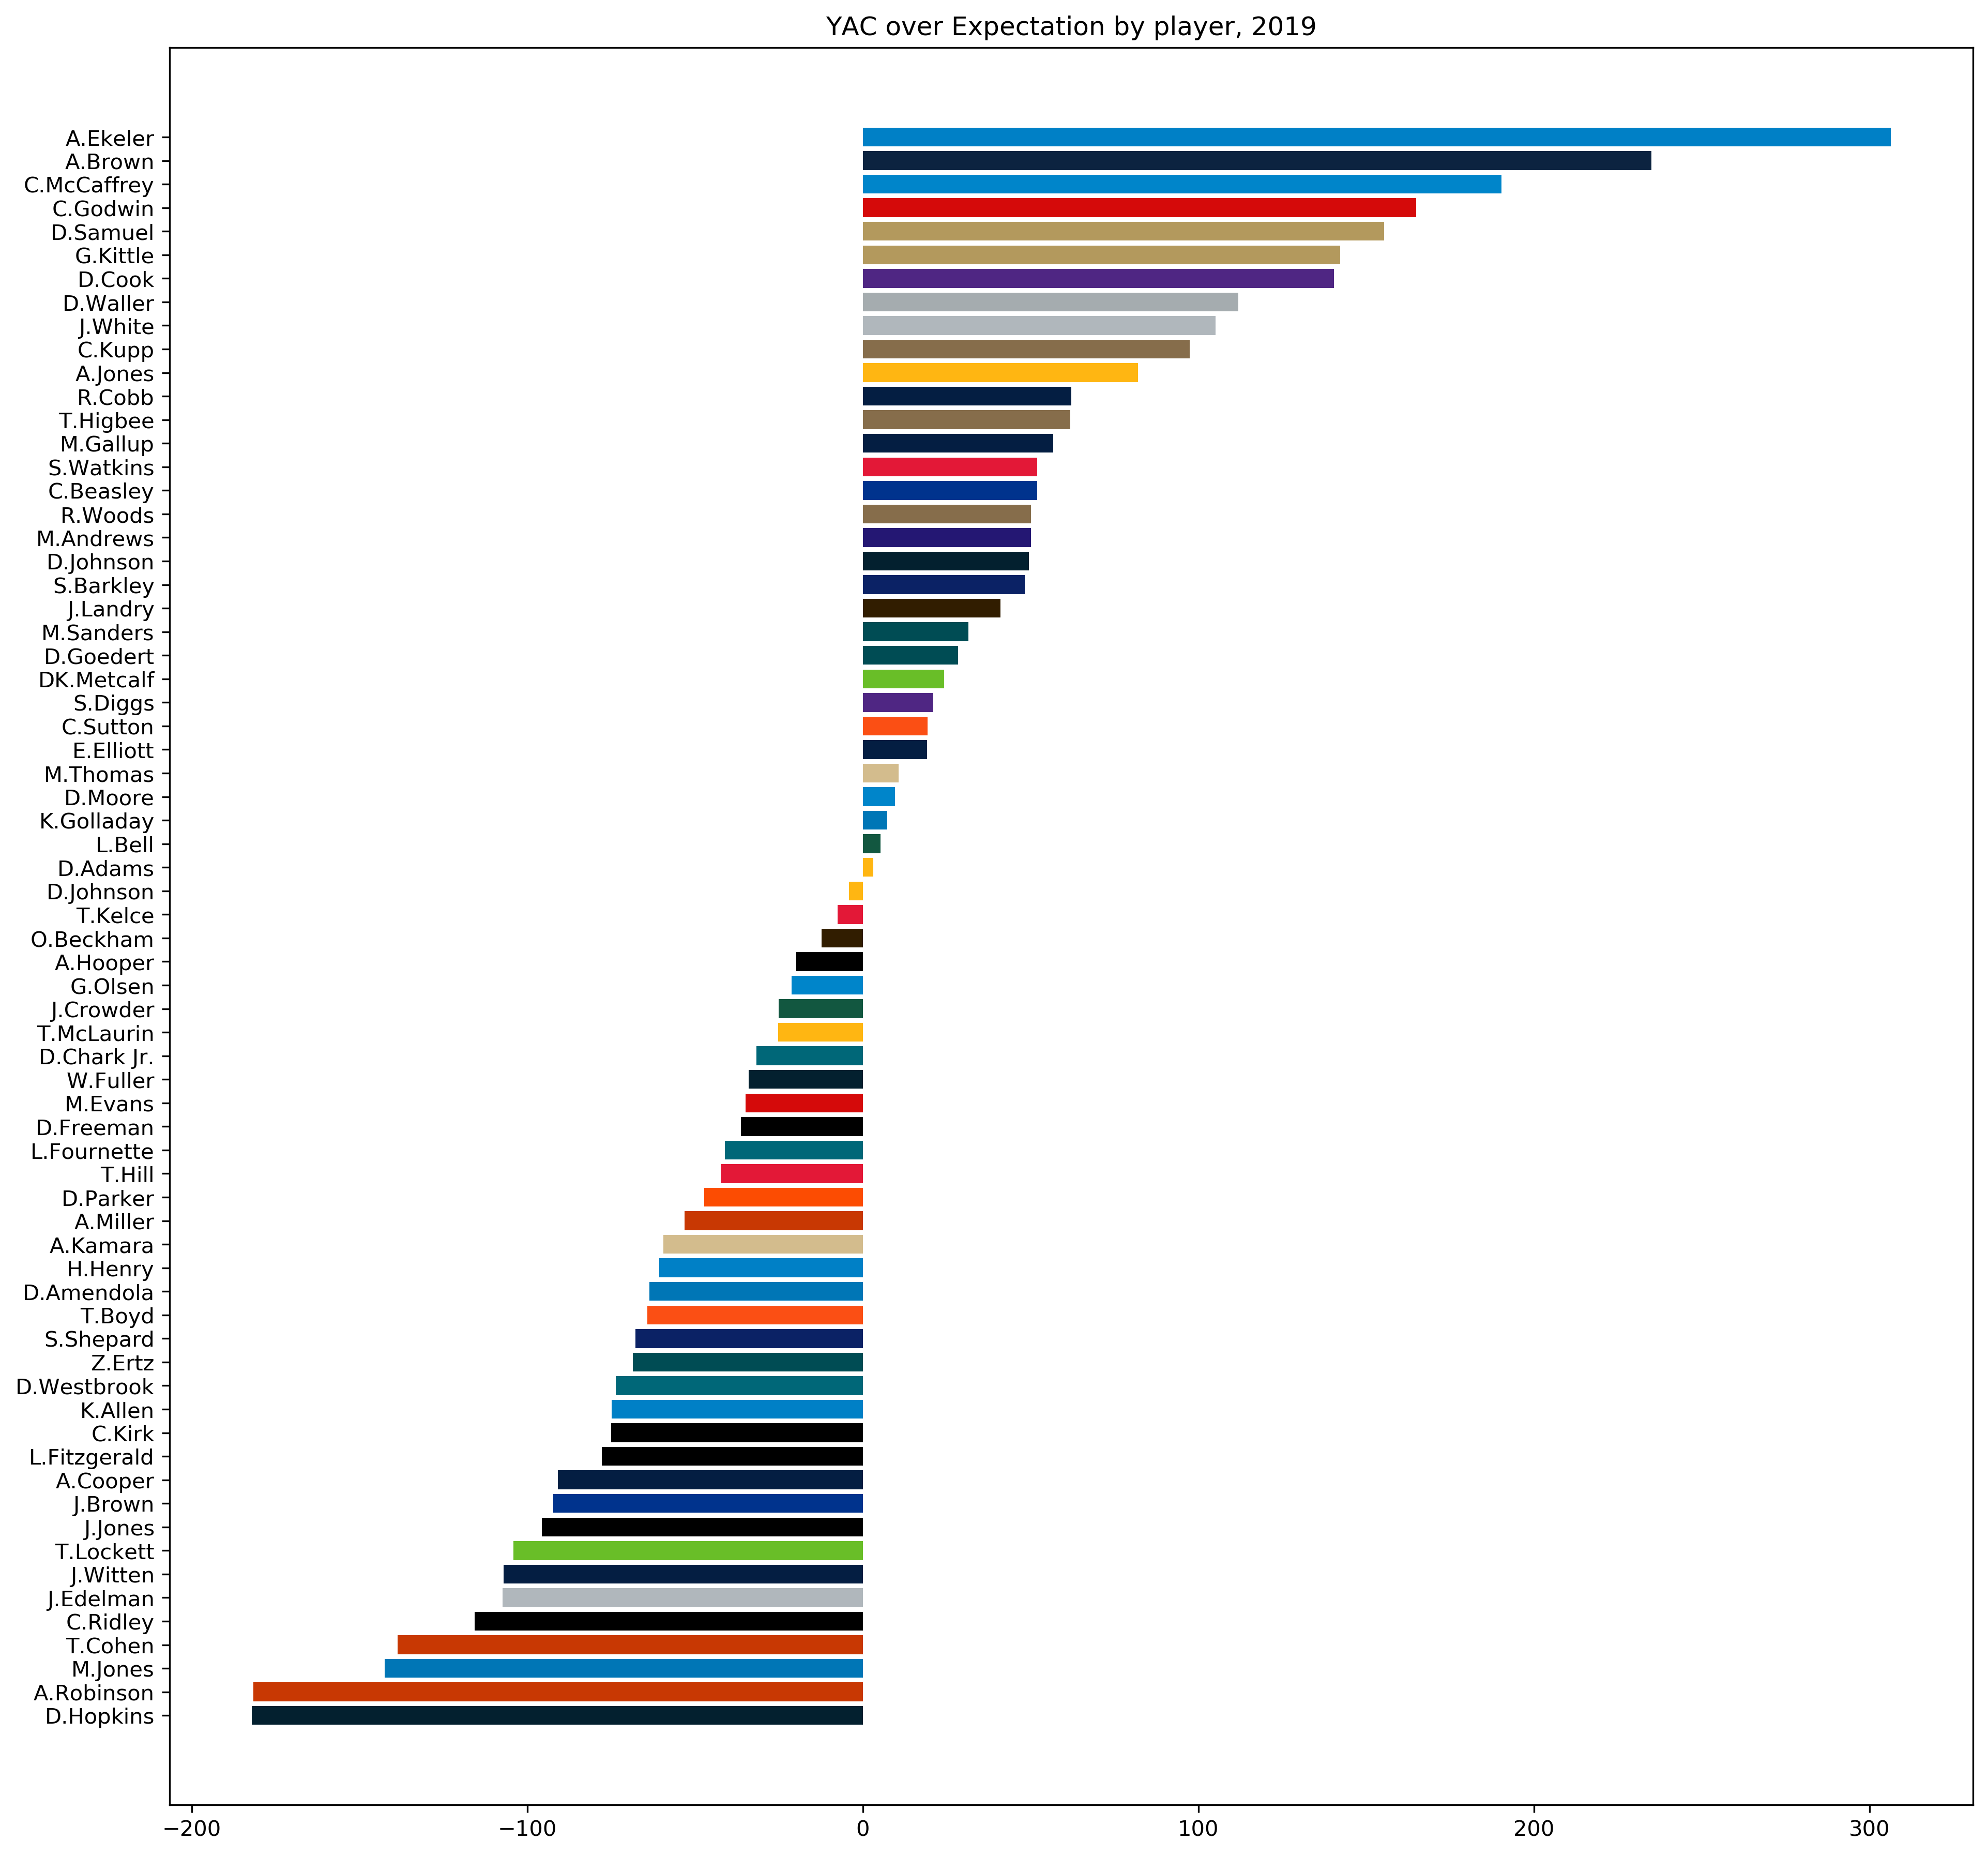

In [68]:
yac_player['2019'] = yac_player['2019'].sort_values('yac_oe', axis=0)
pos = np.arange(len(yac_player['2019']))
col = [team_colors_primary[team] for team in yac_player['2019']['posteam']]
plt.figure(figsize=(15,15), dpi=300)
plt.barh(pos, width=yac_player['2019']['yac_oe'], tick_label=yac_player['2019']['receiver'], color=col)
plt.title('YAC over Expectation by player, 2019')
plt.savefig('yac_oe_player_2019.png')
plt.show()

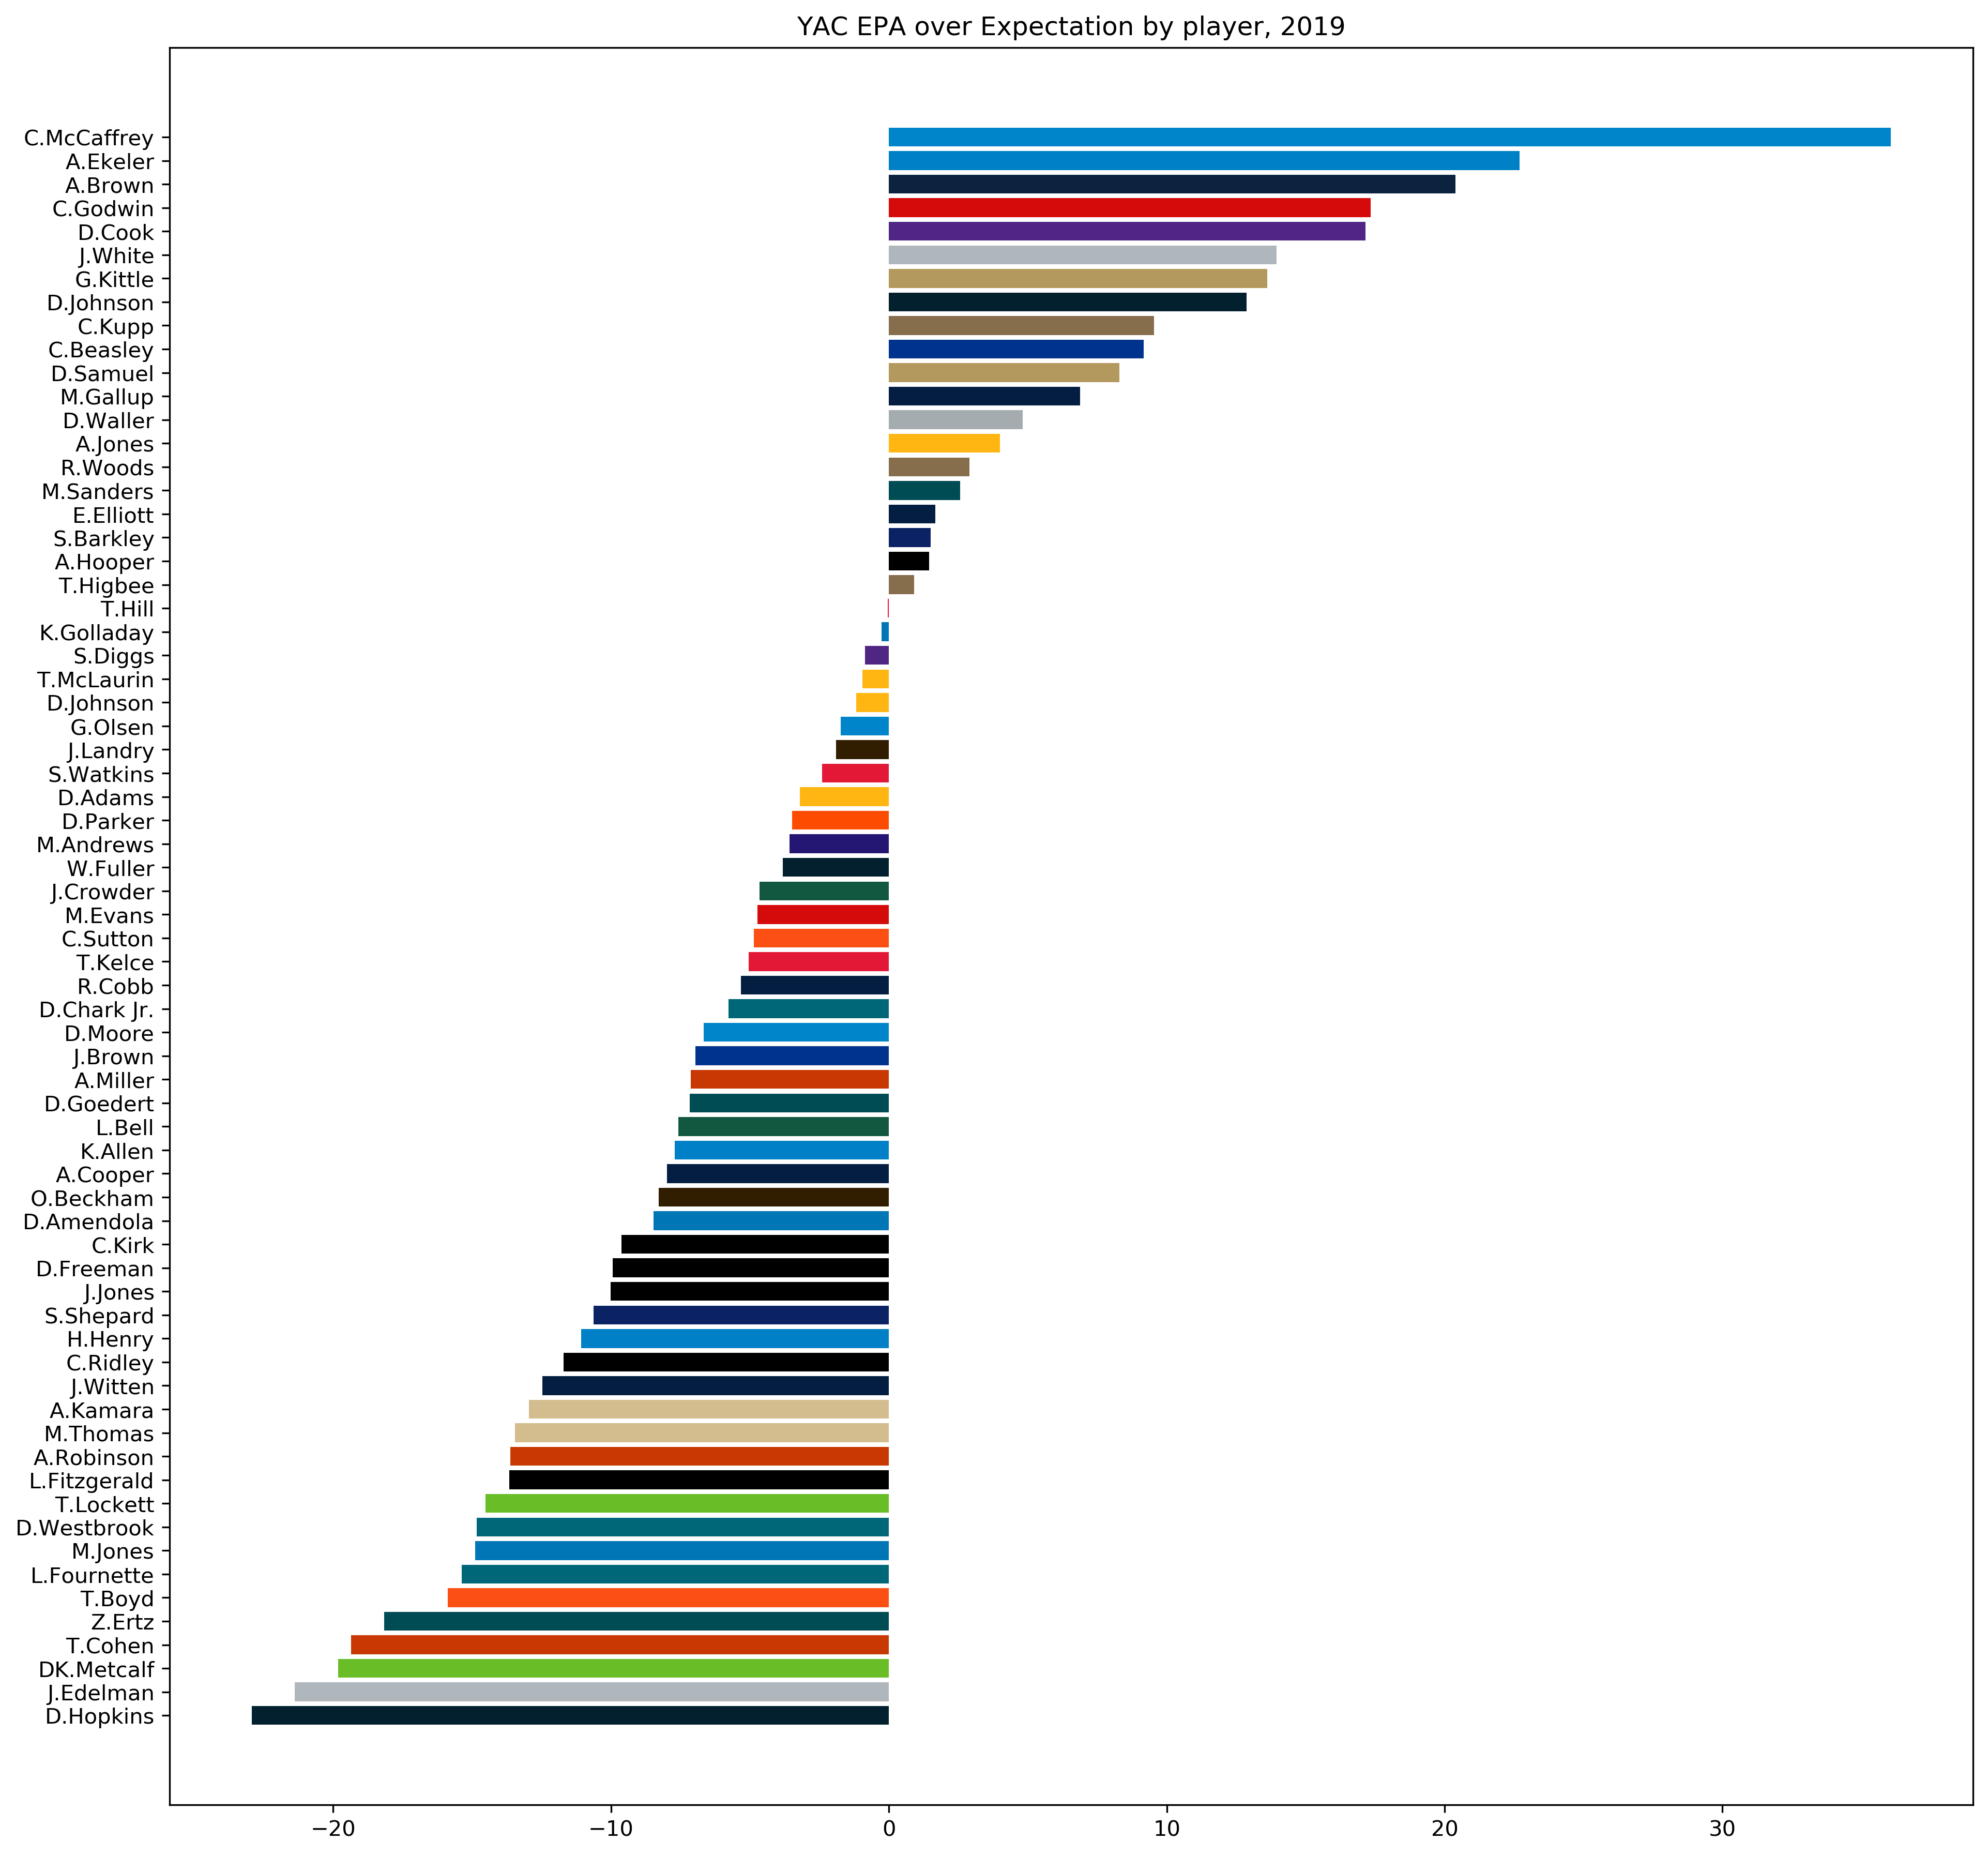

In [69]:
yac_epa_player['2019'] = yac_epa_player['2019'].sort_values('epa_oe', axis=0)
pos = np.arange(len(yac_epa_player['2019']))
col = [team_colors_primary[team] for team in yac_epa_player['2019']['posteam']]
plt.figure(figsize=(15,15), dpi=300)
plt.barh(pos, width=yac_epa_player['2019']['epa_oe'], tick_label=yac_epa_player['2019']['receiver'], color=col)
plt.title('YAC EPA over Expectation by player, 2019')
plt.savefig('yac_epa_oe_player_2019.png')
plt.show()

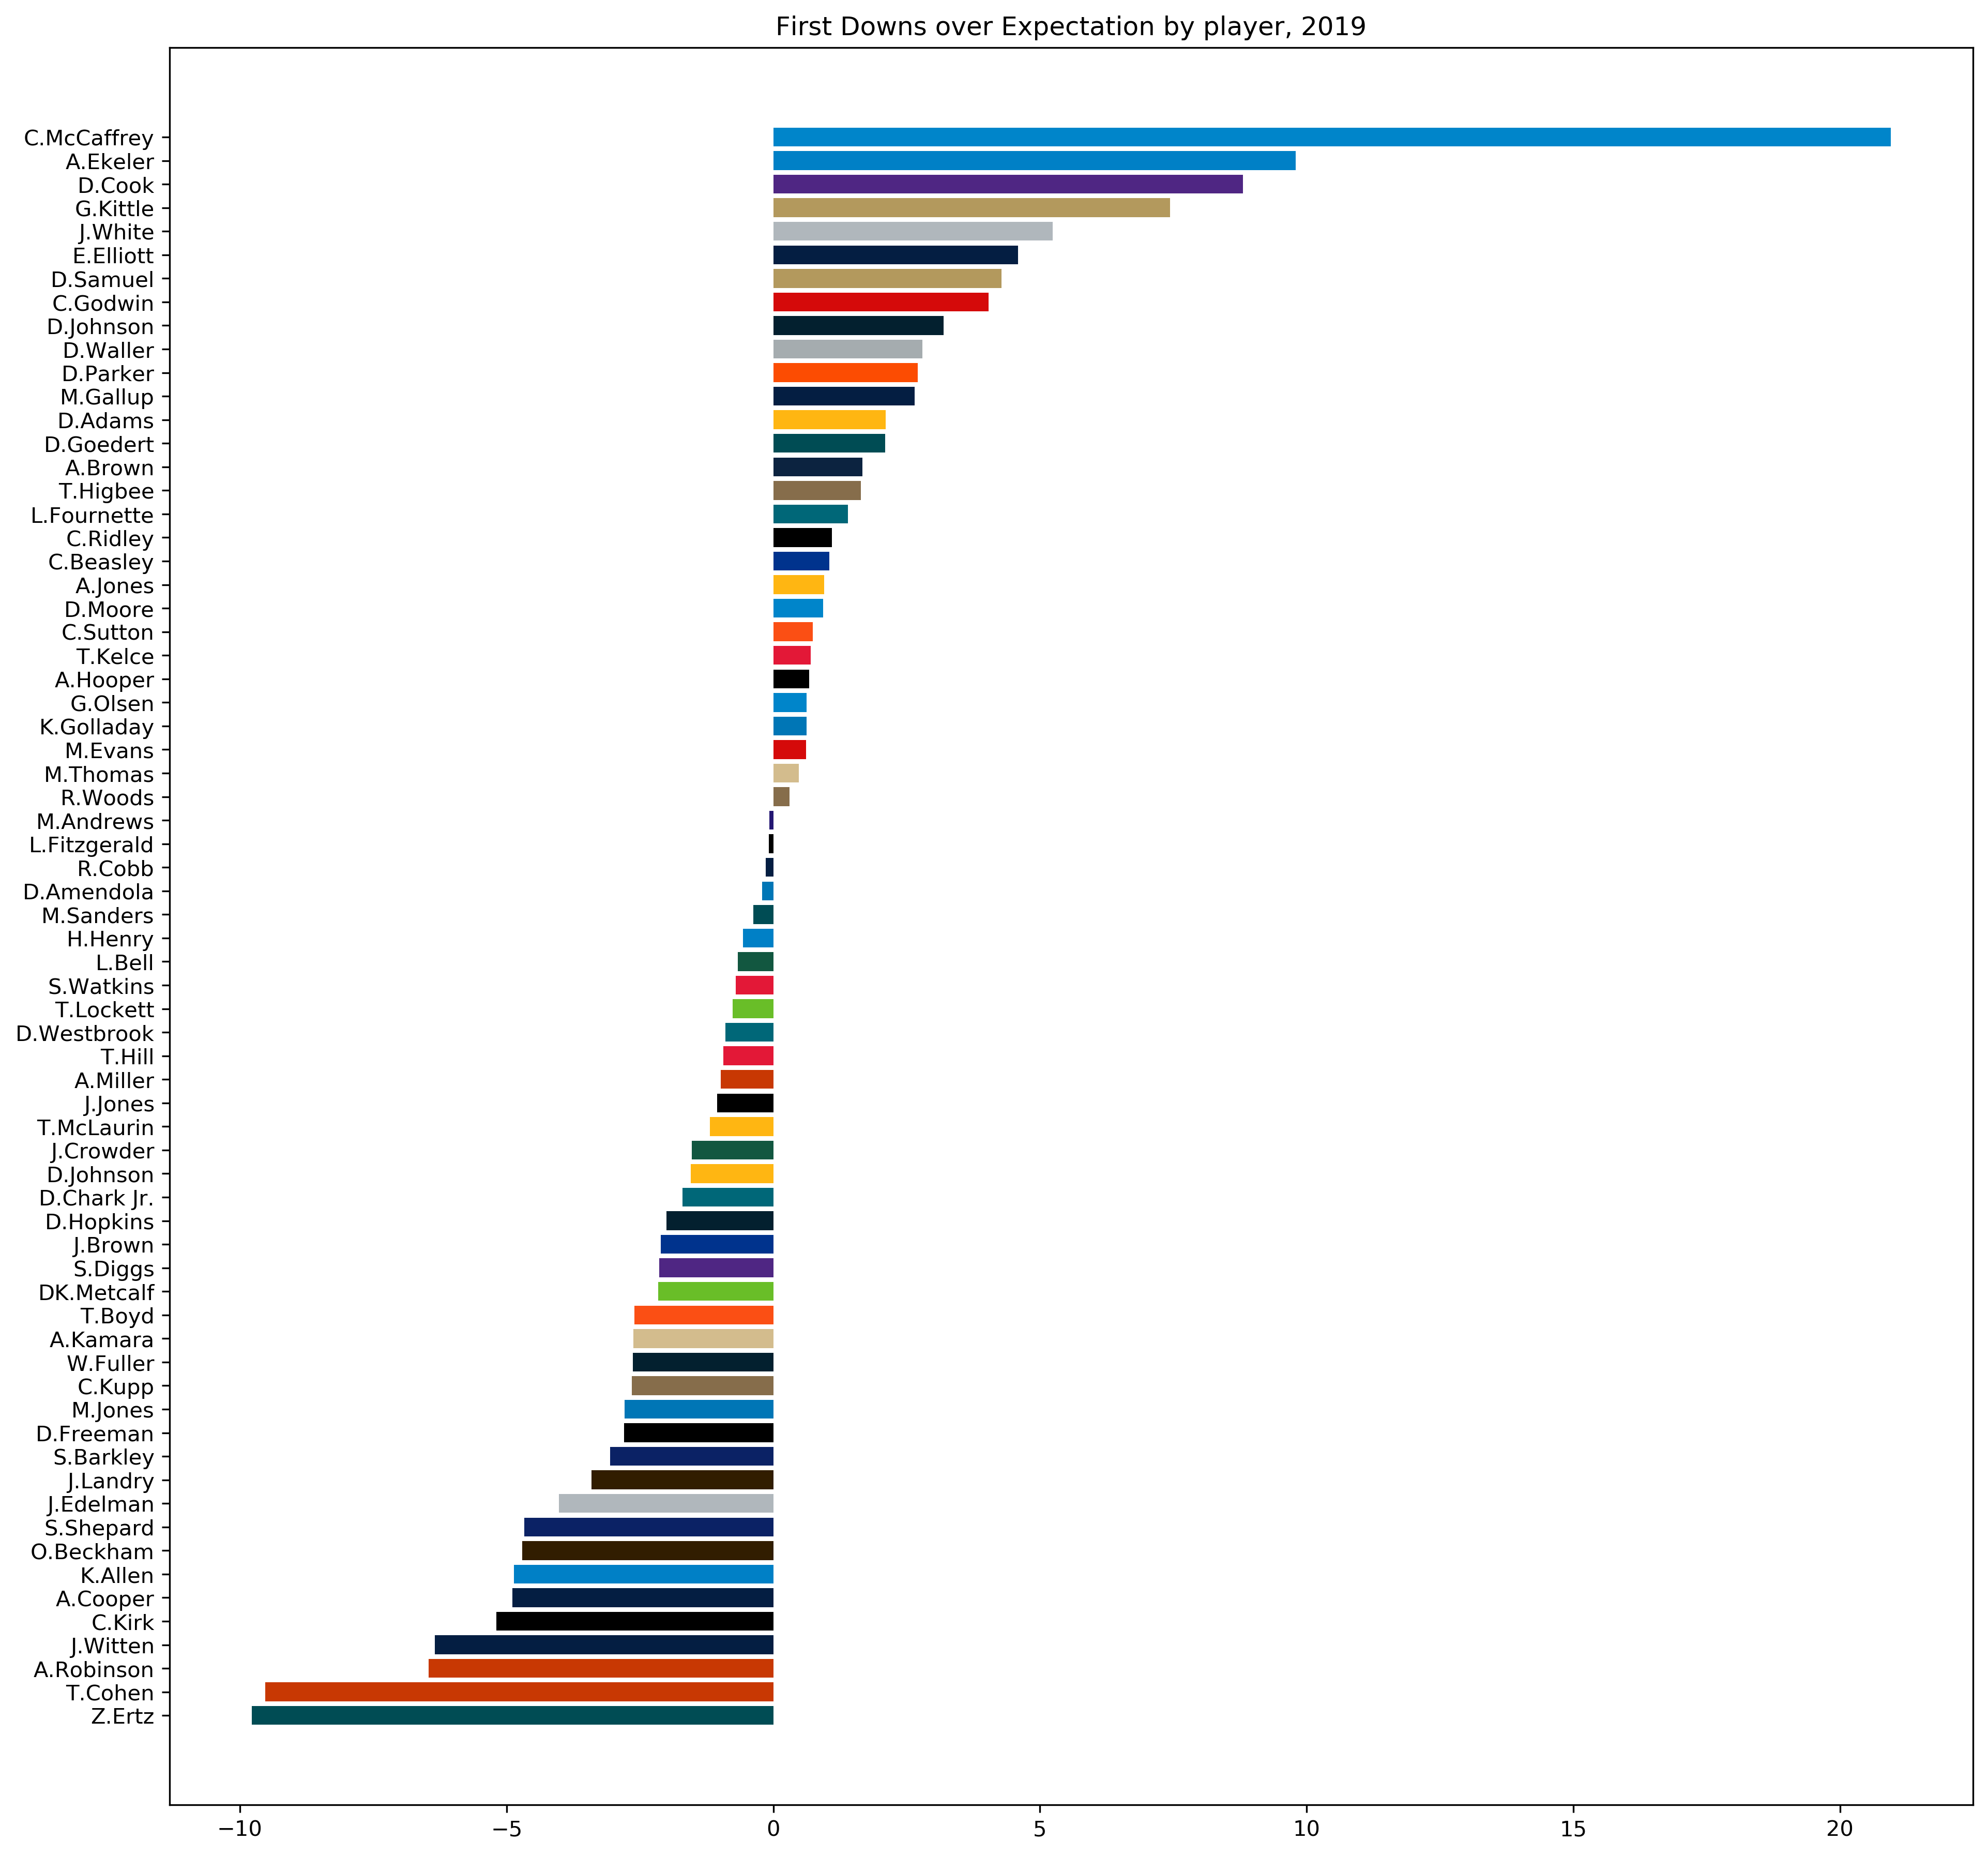

In [70]:
fdoe_player['2019'] = fdoe_player['2019'].sort_values('fd_oe', axis=0)
pos = np.arange(len(fdoe_player['2019']))
col = [team_colors_primary[team] for team in fdoe_player['2019']['posteam']]
plt.figure(figsize=(15,15), dpi=300)
plt.barh(pos, width=fdoe_player['2019']['fd_oe'], tick_label=fdoe_player['2019']['receiver'], color=col)
plt.title('First Downs over Expectation by player, 2019')
plt.savefig('fdoe_player_2019.png')
plt.show()

In [74]:
'''
Rsq values year-over-year
        Team  Player
YAC_OE  0.107 0.150
EPA_OE  0.090 0.117
FD_OE   0.064 0.061
'''

rsq = np.array([[r_team_yac ** 2, r_player_yac ** 2],
                [r_team_epa ** 2, r_player_epa ** 2],
                [r_team_fdoe ** 2, r_player_fdoe ** 2]])
print(rsq)

[[0.10669986 0.14945362]
 [0.08980237 0.11743698]
 [0.0644931  0.06070978]]


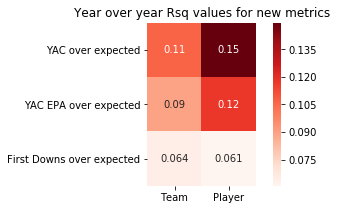

In [75]:
metrics = ['YAC over expected', 'YAC EPA over expected', 'First Downs over expected']
cols = ['Team', 'Player']

f, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(rsq, annot=True, ax=ax, square=True, cmap='Reds', yticklabels=metrics, xticklabels=cols)
plt.title('Year over year Rsq values for new metrics')
plt.savefig('yac_yoy.png')
plt.show()